In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
import csv
%matplotlib inline

In [3]:

def scale_set1(x):
    return (x - 2)/10

# def scale_set2(x):
#   return (x - 2)/8

def scale_set2(x):
    return (x - 1)/5


def scale_set3(x):
    return x/3

def scale_set4(x):
    return x/3

def scale_set5(x):
    return x/4

def scale_set6(x):
    return x/4

def scale_set7(x):
    return x/30

def scale_set8(x):
    return x/60

def un_normalize(x, eset = 1): 
    if eset == 1:
        return 10 * x + 2
  # if eset == 2:
  #   return 8*x + 2
    if eset == 2:
        return 5*x + 1
    if eset == 3:
        return 3 * x
    if eset == 4:
        return 3 * x
    if eset == 5:
        return 4 * x
    if eset == 6:
        return 4 * x
    if eset == 7:
        return 30 * x
    if eset == 8:
        return 60 * x

In [4]:
file_loc = "exclusive_training_data_with_grammar_with_NSP.tsv"
df = pd.read_csv(file_loc,sep='\t')
scaled_scores = list()
for i in range(len(df)):
    current_set = df.iloc[i]['essay_set']
    current_score = df.iloc[i]['domain1_score']
    if current_set == 1:
        scaled_score = scale_set1(current_score)
    if current_set == 2:
        scaled_score = scale_set2(current_score)
    if current_set == 3:
        scaled_score = scale_set3(current_score)                
    if current_set == 4:
        scaled_score = scale_set4(current_score)
    if current_set == 5:
        scaled_score = scale_set5(current_score)
    if current_set == 6:
        scaled_score = scale_set6(current_score)
    if current_set == 7:
        scaled_score = scale_set7(current_score)
    if current_set == 8:
        scaled_score = scale_set8(current_score)   
    scaled_scores.append(scaled_score)    

df['scaled_score'] = scaled_scores
     

In [5]:
lengths = [len(essay.split()) for essay in df['essay']]
df['essay_length'] = lengths

In [6]:
df

essay_set                                              essay  \
0              7  One time I was patient was when I had to get s...   
1              5  I think the mood of the passage @ORGANIZATION1...   
2              5  The mood created by the author is a happy and ...   
3              3  The feature of the setting included nice cool ...   
4              6  While attempting to allow dirigibles to dock o...   
5              5  The author's mood is very grateful and happy. ...   
6              7  A wize man once said patience is a is a vertue...   
7              8   Laughter is indeed an important part of anyon...   
8              5  To me the mood of the author is happy. Thinks ...   
9              4  The author concluded the story with his paragr...   
10             4  I will take that test aGain. She has @CAPS1 co...   
11             2  I believe that certain materials such as books...   
12             4  The author concludes with this sentence becaus...   
13             7  Ive been to @LOCATION1 @CAPS1 before, my famil...   
14             7  This is my story about being patient, I close ...   
15             2  Reading is very popular. It is something to do...   
16             4  The author concludes this story with this para...   
17             4  Throughout this story we are given background ...   
18             6  The builders of the Empire State Building face...   
19             3  The @CAPS1 is affected in many ways. The major...   
20             2  Most people have been debating on whether or n...   
21             5  The mood created by the author in the memoir i...   
22             8                                                ...   
23             6  The builders of the Empire State Building face...   
24             1  Dear @CAPS1, I think computers aren't good for...   
25             1  @ORGANIZATION1, In today's age computers are s...   
26             3  @CAPS1 directions, June, lack of water all are...   
27             7  A time I was patient was waiting @NUM1 to @NUM...   
28             6  The idea of using a mooring mast in order to a...   
29             6  There were many obstacles that the builders of...   
...          ...                                                ...   
11648          3  In the essay Rough Road Ahead: Do not exceed S...   
11649          5  In the memoir the author obviously seems to be...   
11650          3  The affects of the features around them affect...   
11651          3  The setting is in a California which isnt real...   
11652          2  In @DATE1's world there are so many things aro...   
11653          1  Dear @CAPS1, @CAPS2 are not bad for society. T...   
11654          1  I think we need our computers. If we dont have...   
11655          6  In the excerpt "The Mooring Mast" by @ORGANIZA...   
11656          2  The way that the books, musics ,ect. are made ...   
11657          6  In the excerpt The Mooring Mast by Marcia Amid...   
11658          5                                The mood was great.   
11659          8   Emotions are an essential part of life. Some ...   
11660          3  The setting of Rough Road Ahead: Do Not Exceed...   
11661          1  Dear Newspaper @CAPS1, I believe computers and...   
11662          1  To whom it @MONTH1 concern: I will agree that ...   
11663          7  @CAPS1 was a beautifal morning, sky was blue, ...   
11664          6  The architects and builders of the Empire Stat...   
11665          7  One time I had to be very pationt. I had two w...   
11666          5  The mood created by the author in the memoir t...   
11667          1  Dear @CAPS1, @CAPS2t you think computers help ...   
11668          8  It's true @CAPS8 they say, time flies when you...   
11669          5  Throughout this memoir the mood was very reali...   
11670          4  The author concludes the story with this parag...   
11671          1  Dear @ORGANIZATION1 @ORGANIZATION1 @ORGANIZATI...   
11672          4  What the auth

# Correlation between essay length and score


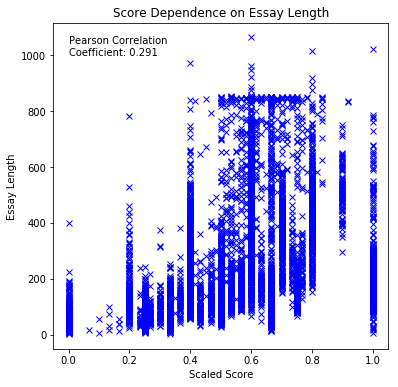

In [7]:
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(df['scaled_score'], df['essay_length'], 'bx')
plt.xlabel("Scaled Score")
plt.ylabel("Essay Length")
plt.title("Score Dependence on Essay Length")
correlation, p_val = pearsonr(df['scaled_score'], df['essay_length'])
plt.text(0, 1000, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

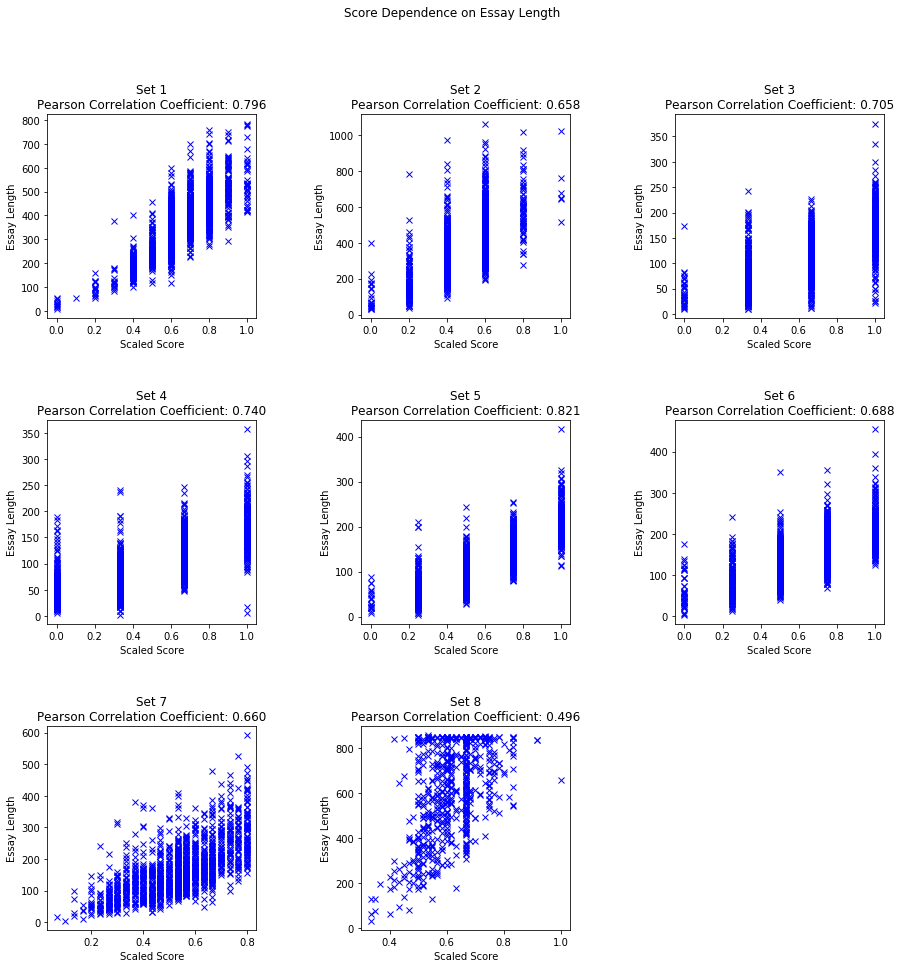

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5, wspace = 0.5)
fig.suptitle('Score Dependence on Essay Length')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        essay_lengths = [df.iloc[i]['essay_length'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, essay_lengths , 'bx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Essay Length")
        correlation, p_val = pearsonr(scaled_scores, essay_lengths)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))
fig.delaxes(ax[2][2])

plt.show()

# Correlation between score and average frequency score
Calcultes the average word frequency score of the text.

The highest average frequency score that can be obtained from using the BNC as a reference corpus is 5776384, from the instance of a text containing only the word “the”, which carries the highest reference frequency score of 5776384.

Omitting the instance where none of the words in the input text can be found in the reference corpus, the lowest average frequency score that can be obtained is 1, from the instance where the text only contains words which carry reference frequency scores of 1.

The average frequency score may be interpreted as a point on a spectrum from the highest to the lowest attainable scores, wherein which the lower the score, or the closer the score is to 1, supposedly the more sophisticated the given text is.


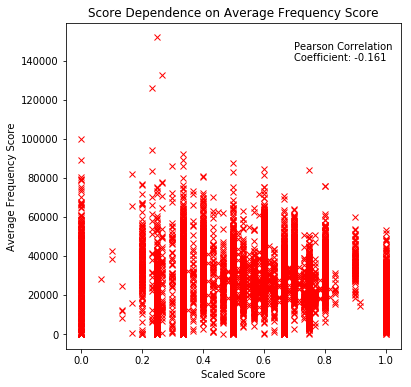

In [12]:
plt.plot(df['scaled_score'], df['wordfrequency_all'], 'rx')
plt.xlabel("Scaled Score")
plt.ylabel("Average Frequency Score")
plt.title("Score Dependence on Average Frequency Score")
correlation, p_val = pearsonr(df['scaled_score'], df['wordfrequency_all'])
plt.text(0.7, 140000, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

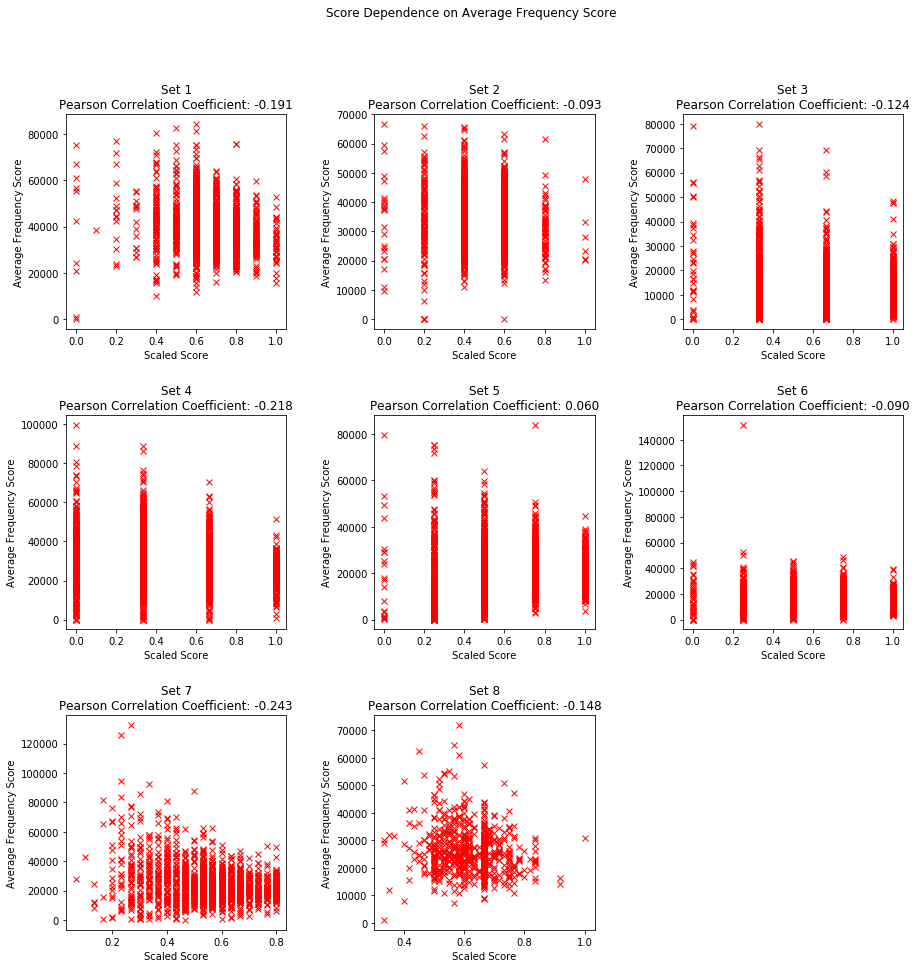

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Average Frequency Score')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j == 9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        avg_frequency_scores = [df.iloc[i]['wordfrequency_all'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, avg_frequency_scores , 'rx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Average Frequency Score")
        correlation, p_val = pearsonr(scaled_scores, avg_frequency_scores)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

# Correlation between score and average word frequency score of the content words in the text

For the content words, the highest average frequency score that can be obtained is 134941, from the instance of a text containing only the content word “time”, which carries the highest reference frequency score of 134941 among all the content words in the corpus.

Once again omitting the instance where none of the words in the input text can be found in the compiled dictionary for content words, the lowest average frequency score that can be obtained is 1, from the instance where the text only contains content words which carry reference frequency scores of 1. 

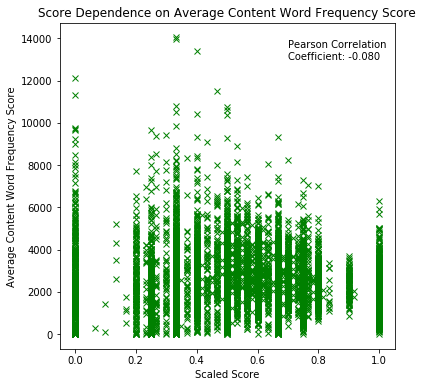

In [81]:
plt.plot(df['scaled_score'], df['wordfrequency_content'], 'gx')
plt.xlabel("Scaled Score")
plt.ylabel("Average Content Word Frequency Score")
plt.title("Score Dependence on Average Content Word Frequency Score")
correlation, p_val = pearsonr(df['scaled_score'], df['wordfrequency_content'])
plt.text(0.7, 13000, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

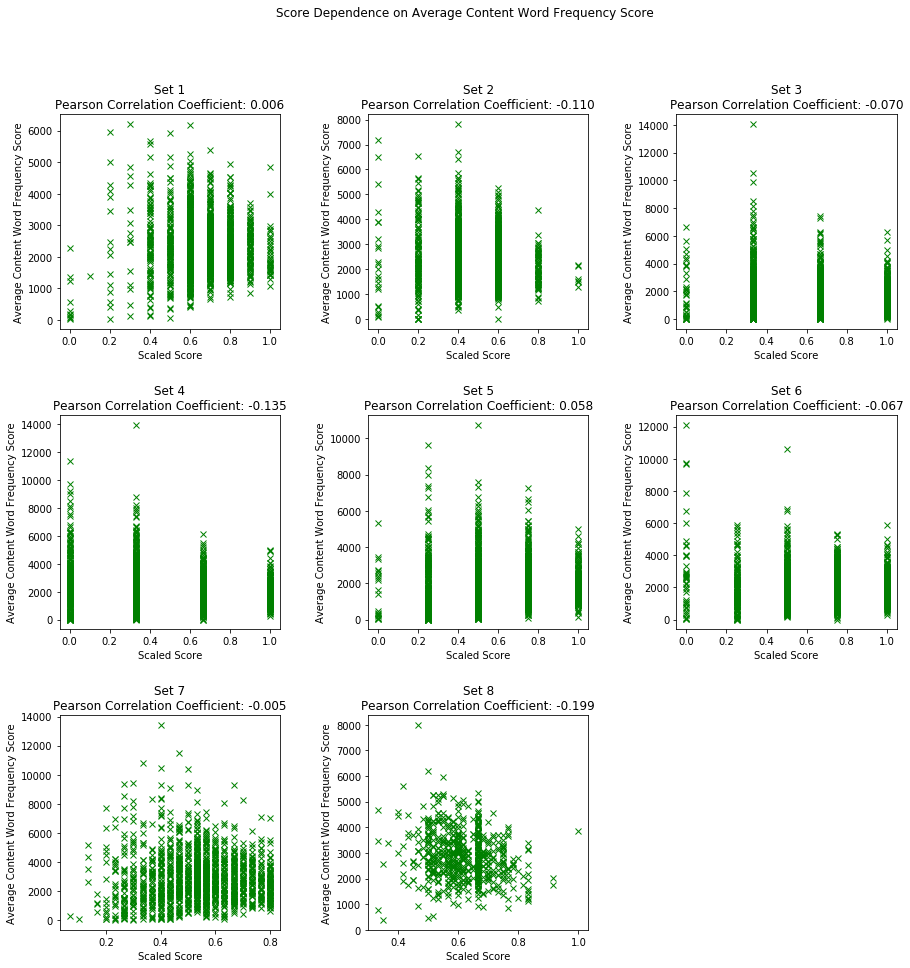

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Average Content Word Frequency Score')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        avg_content_frequency_scores = [df.iloc[i]['wordfrequency_content'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, avg_content_frequency_scores , 'gx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Average Content Word Frequency Score")
        correlation, p_val = pearsonr(scaled_scores, avg_content_frequency_scores)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))
fig.delaxes(ax[2][2])

plt.show()

# Correlation between score and average word frequency score of the function words in the text

Calculates the average word frequency score of the function words in the text.

For function words, the highest average frequency score that can be obtained is 5776384, from the instance of a text containing only the function word “the”, which carries the highest reference frequency score of 5776384 among all the function words in the corpus.

Omitting the instance where none of the words in the input text can be found in the compiled dictionary for function words,
the lowest average frequency score that can be obtained is 1,
from the instance where the text only contains words which carry reference frequency scores of 1. 

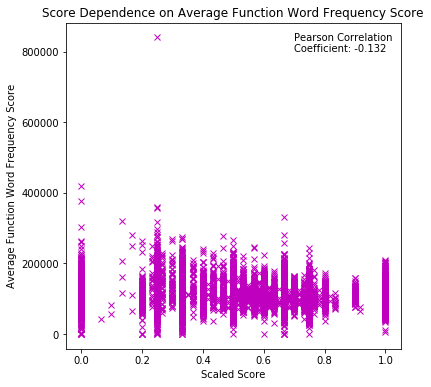

In [92]:
plt.plot(df['scaled_score'], df['wordfrequency_function'], 'mx')
plt.xlabel("Scaled Score")
plt.ylabel("Average Function Word Frequency Score")
plt.title("Score Dependence on Average Function Word Frequency Score")
correlation, p_val = pearsonr(df['scaled_score'], df['wordfrequency_function'])
plt.text(0.7, 800000, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

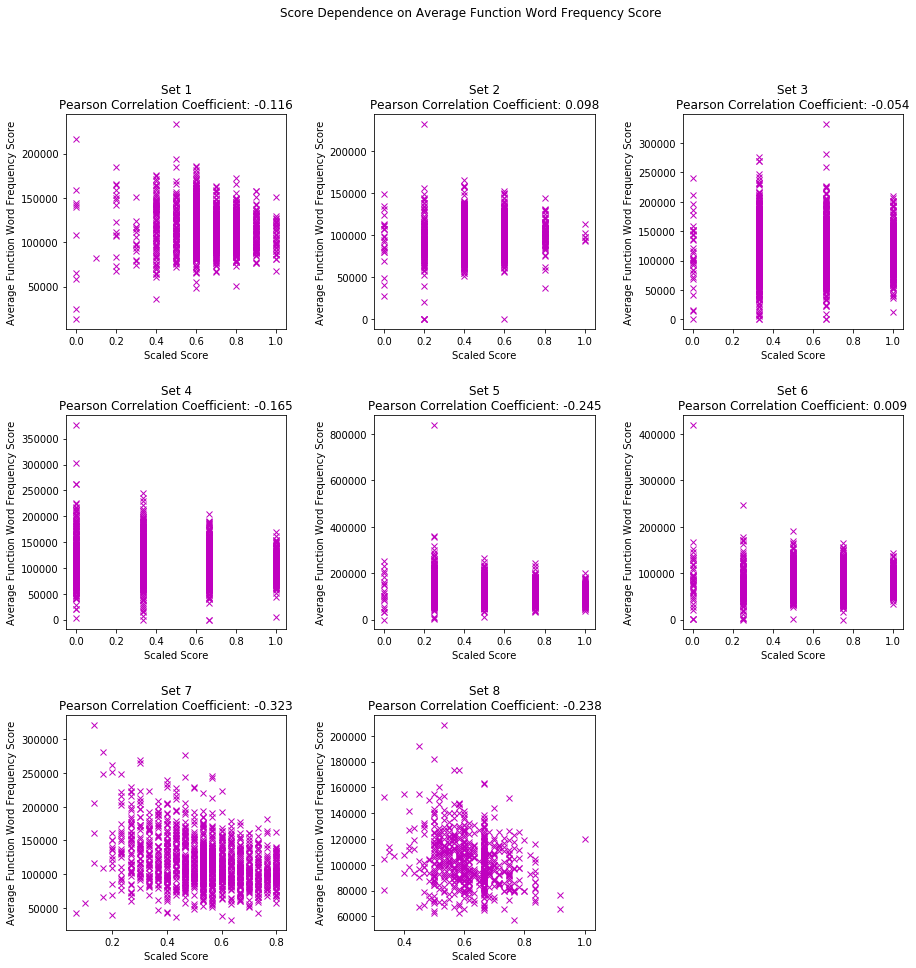

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Average Function Word Frequency Score')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j ==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        avg_function_frequency_scores = [df.iloc[i]['wordfrequency_function'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, avg_function_frequency_scores , 'mx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Average Function Word Frequency Score")
        correlation, p_val = pearsonr(scaled_scores, avg_function_frequency_scores)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])

plt.show()

# Correlation between score and average word range


Calculates the average word range score of the words in the text.

The highest average range score that can be obtained from using the BNC as a reference corpus is 3209, from the instance of a text comprised only of the words “the”, “of”, and “and”, all of which carry the highest reference range score of 3209, which is also the total number of documents in the BNC.

Omitting the instance where none of the words in the input text can be found in the reference corpus,
the lowest average range score that can be obtained is 1, from the instance where the text only contains words which carry reference range scores of 1. 

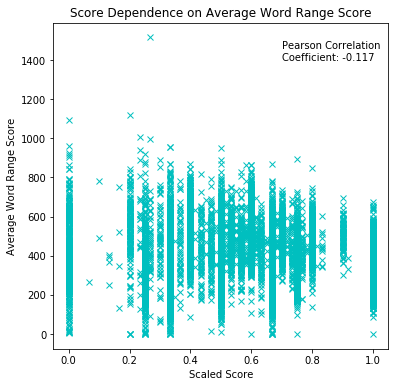

In [28]:
plt.plot(df['scaled_score'], df['wordrangescore'], 'cx')
plt.xlabel("Scaled Score")
plt.ylabel("Average Word Range Score")
plt.title("Score Dependence on Average Word Range Score")
correlation, p_val = pearsonr(df['scaled_score'], df['wordrangescore'])
plt.text(0.7, 1400, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

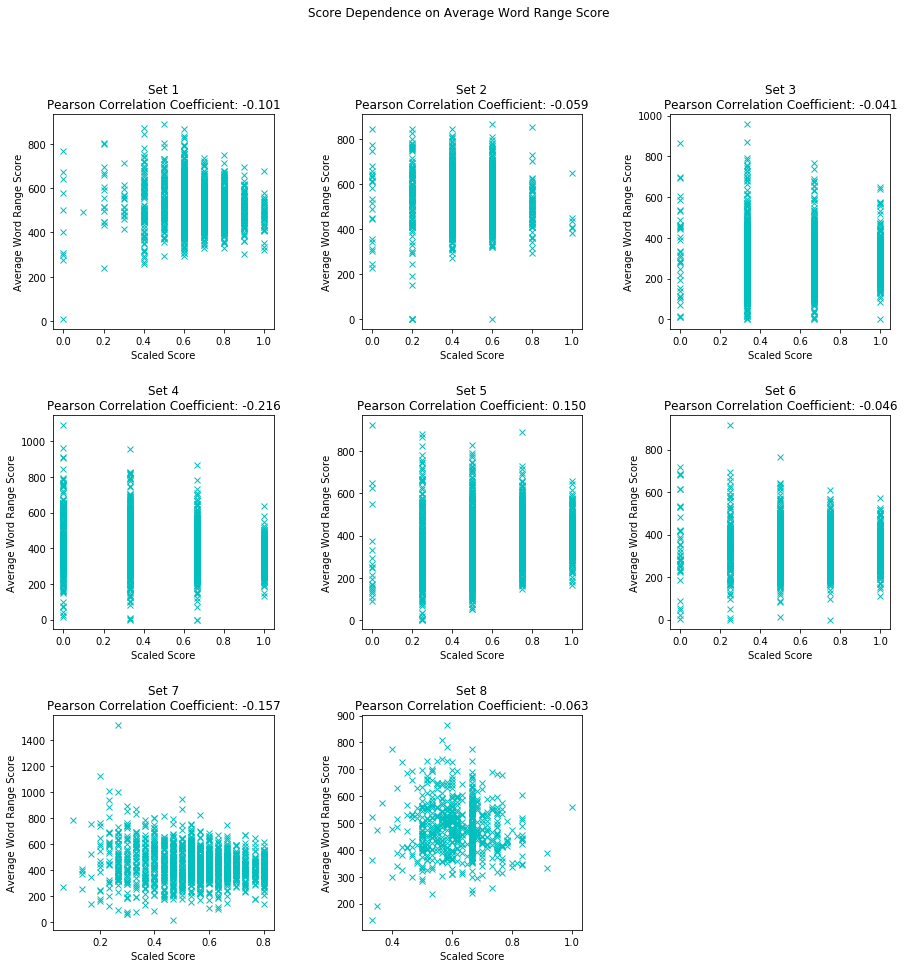

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Average Word Range Score')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        avg_word_range_scores = [df.iloc[i]['wordrangescore'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, avg_word_range_scores , 'cx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Average Word Range Score")
        correlation, p_val = pearsonr(scaled_scores, avg_word_range_scores)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

# Correlation between essay score and academic word score



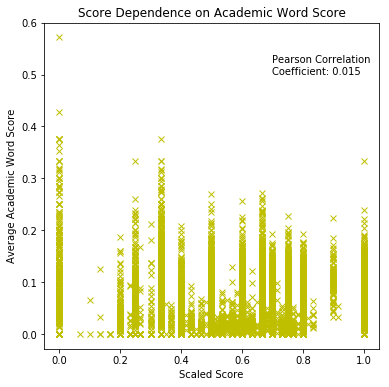

In [106]:
plt.plot(df['scaled_score'], df['academicwordscore'], 'yx')
plt.xlabel("Scaled Score")
plt.ylabel("Average Academic Word Score")
plt.title("Score Dependence on Academic Word Score")
correlation, p_val = pearsonr(df['scaled_score'], df['academicwordscore'])
plt.text(0.7, 0.5, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

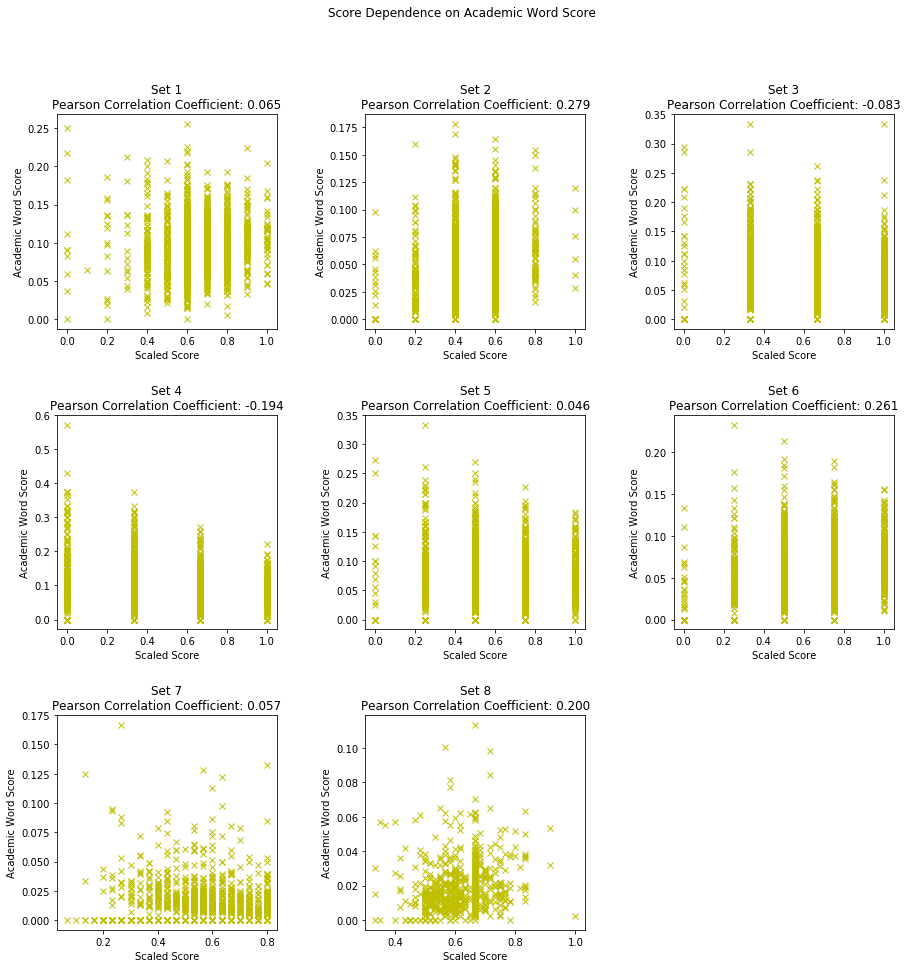

In [30]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Academic Word Score')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        academic_word_scores = [df.iloc[i]['academicwordscore'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, academic_word_scores , 'yx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Academic Word Score")
        correlation, p_val = pearsonr(scaled_scores, academic_word_scores)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

# Correlation between score and academic frequency sublists 1-5

The words in the AWL are divided into 10 sublists by frequency, with words in sublist 1 carrying highest frequency, and words in sublist 10 carrying lowest frequency.

This function in addition to the academic list score, also calculates the fraction of the academic words found in the given text belonging to each sublist.

Thus, the sum of the fractions of sublists 1-10 should always equal 1.

The highest academic list score that can be obtained from using the AWL as a reference corpus is 1, from the instance where all the words in the text are words from the AWL.

In contrast, the lowest academic list score that can be obtained is 0,
from the instance where the text contains no academic words as defined by the AWL.

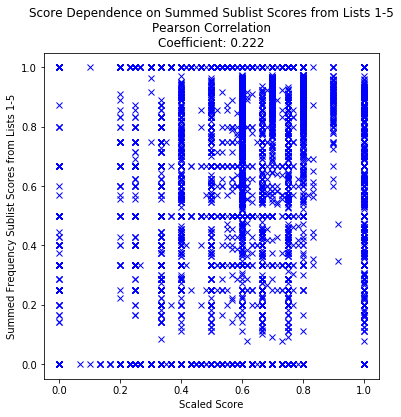

In [111]:
sublist_12345_scores = [df.iloc[i]['sublist1score'] + df.iloc[i]['sublist2score'] + df.iloc[i]['sublist3score'] + df.iloc[i]['sublist4score'] + df.iloc[i]['sublist5score']  for i in range(len(df))]
plt.plot(df['scaled_score'], sublist_12345_scores, 'bx')
plt.xlabel("Scaled Score")
plt.ylabel("Summed Frequency Sublist Scores from Lists 1-5")
correlation, p_val = pearsonr(df['scaled_score'], sublist_12345_scores)
plt.title("Score Dependence on Summed Sublist Scores from Lists 1-5\nPearson Correlation\nCoefficient: %.3f" %(correlation))

#plt.text(0.7, 1.5, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

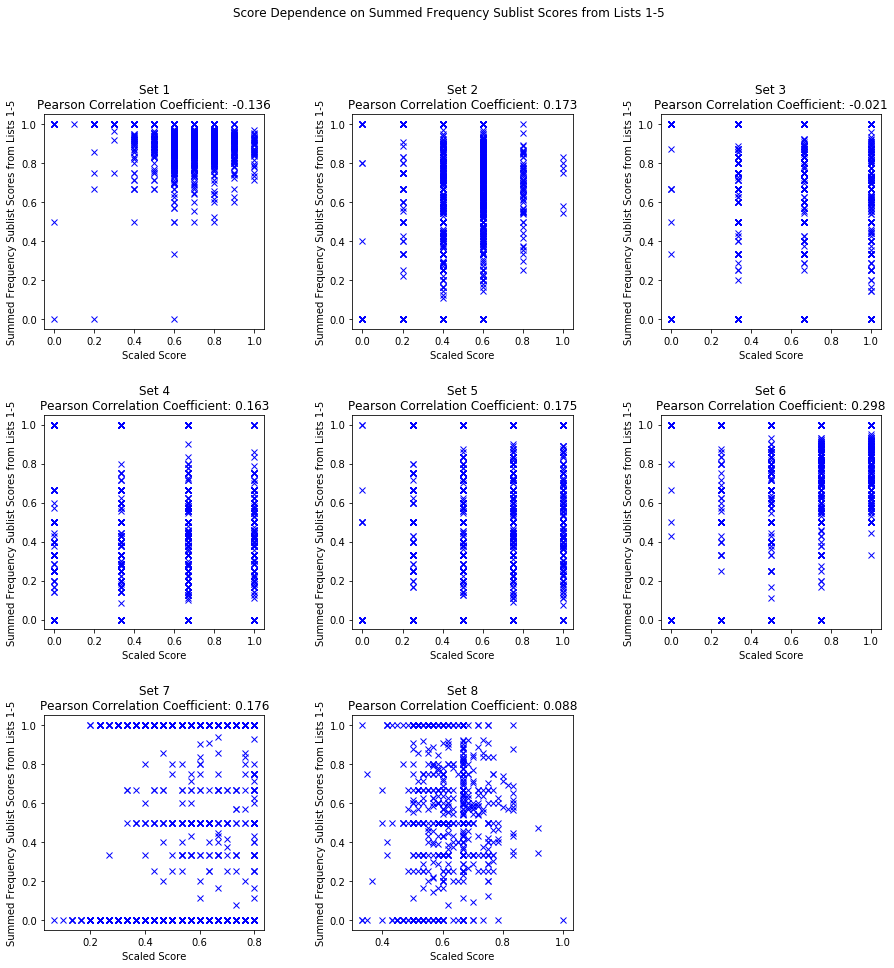

In [31]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Summed Frequency Sublist Scores from Lists 1-5')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j == 9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        sublist_12345_scores = [df.iloc[i]['sublist1score'] + df.iloc[i]['sublist2score'] + df.iloc[i]['sublist3score'] + df.iloc[i]['sublist4score'] + df.iloc[i]['sublist5score']  for i in range(len(df)) if df.iloc[i]['essay_set']==j]
        col.plot(scaled_scores, sublist_12345_scores , 'bx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Summed Frequency Sublist Scores from Lists 1-5")
        correlation, p_val = pearsonr(scaled_scores, sublist_12345_scores)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))
fig.delaxes(ax[2][2])

plt.show()

# Correlation between score and academic frequency sublists 6-10

The words in the AWL are divided into 10 sublists by frequency, with words in sublist 1 carrying highest frequency, and words in sublist 10 carrying lowest frequency.

This function in addition to the academic list score, also calculates the fraction of the academic words found in the given text belonging to each sublist.

Thus, the sum of the fractions of sublists 1-10 should always equal 1.

The highest academic list score that can be obtained from using the AWL as a reference corpus is 1, from the instance where all the words in the text are words from the AWL.

In contrast, the lowest academic list score that can be obtained is 0,
from the instance where the text contains no academic words as defined by the AWL.

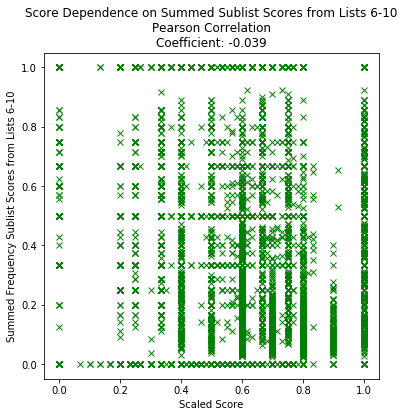

In [112]:
sublist_678910_scores = [df.iloc[i]['sublist6score'] + df.iloc[i]['sublist7score'] + df.iloc[i]['sublist8score'] + df.iloc[i]['sublist9score'] + df.iloc[i]['sublist10score']  for i in range(len(df))]
plt.plot(df['scaled_score'], sublist_678910_scores, 'gx')
plt.xlabel("Scaled Score")
plt.ylabel("Summed Frequency Sublist Scores from Lists 6-10")
correlation, p_val = pearsonr(df['scaled_score'], sublist_678910_scores)
plt.title("Score Dependence on Summed Sublist Scores from Lists 6-10\nPearson Correlation\nCoefficient: %.3f" %(correlation))

#plt.text(0.7, 1.5, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

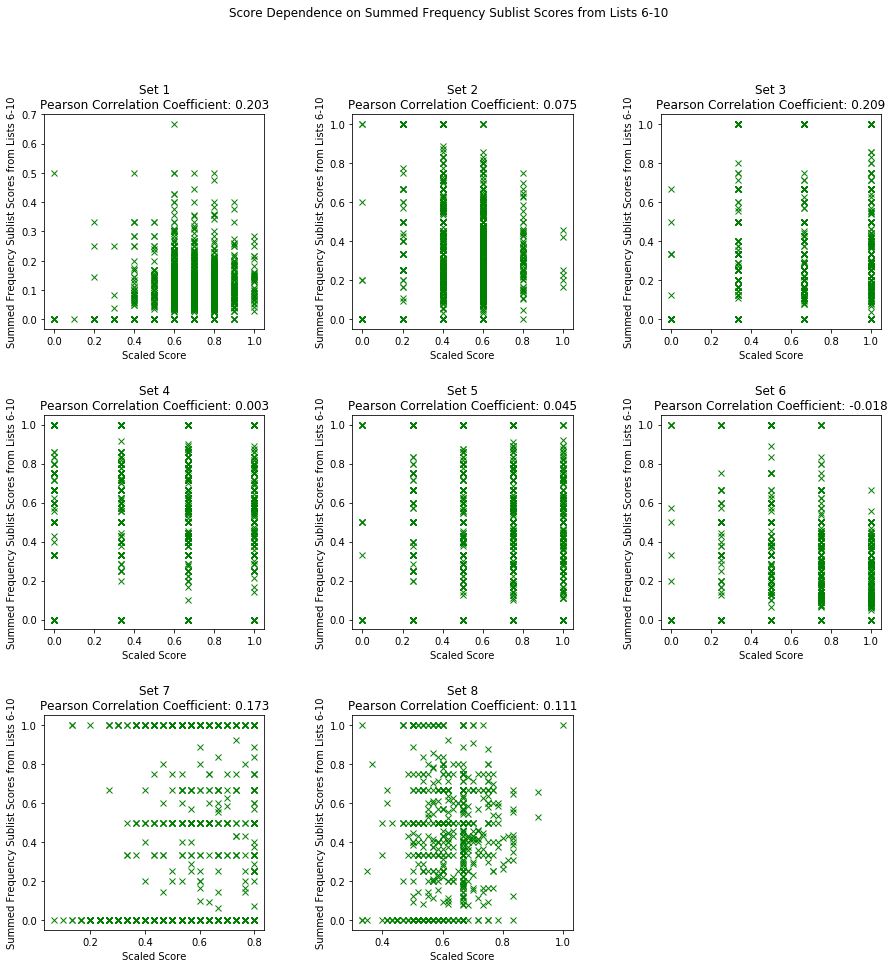

In [32]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Summed Frequency Sublist Scores from Lists 6-10')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j == 9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        sublist_678910_scores = [df.iloc[i]['sublist6score'] + df.iloc[i]['sublist7score'] + df.iloc[i]['sublist8score'] + df.iloc[i]['sublist9score'] + df.iloc[i]['sublist10score']  for i in range(len(df)) if df.iloc[i]['essay_set']==j]
        col.plot(scaled_scores, sublist_678910_scores , 'gx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Summed Frequency Sublist Scores from Lists 6-10")
        correlation, p_val = pearsonr(scaled_scores, sublist_678910_scores)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])

plt.show()

# Correlation between essay score and familiarity score


Calculates word familiarity score by summing the word familiarity scores of words, and dividing the sum by the number of words in the given text that received a familiarity score.

Maximum is 657 from the instance of a text containing only the word "breakfast", which carries the highest familiarity score of 657 from the familiarity list.

Minimum is 101 from the instance of a text containing only the word "metis", which carries the lowest familiarity score of 101 from the familiarity list



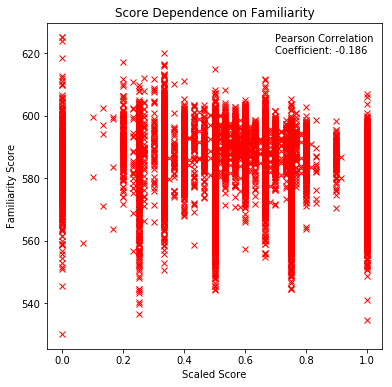

In [117]:
plt.plot(df['scaled_score'], df['familiarityscore'], 'rx')
plt.xlabel("Scaled Score")
plt.ylabel("Familiarity Score")
plt.title("Score Dependence on Familiarity")
correlation, p_val = pearsonr(df['scaled_score'], df['familiarityscore'])
plt.text(0.7, 620, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

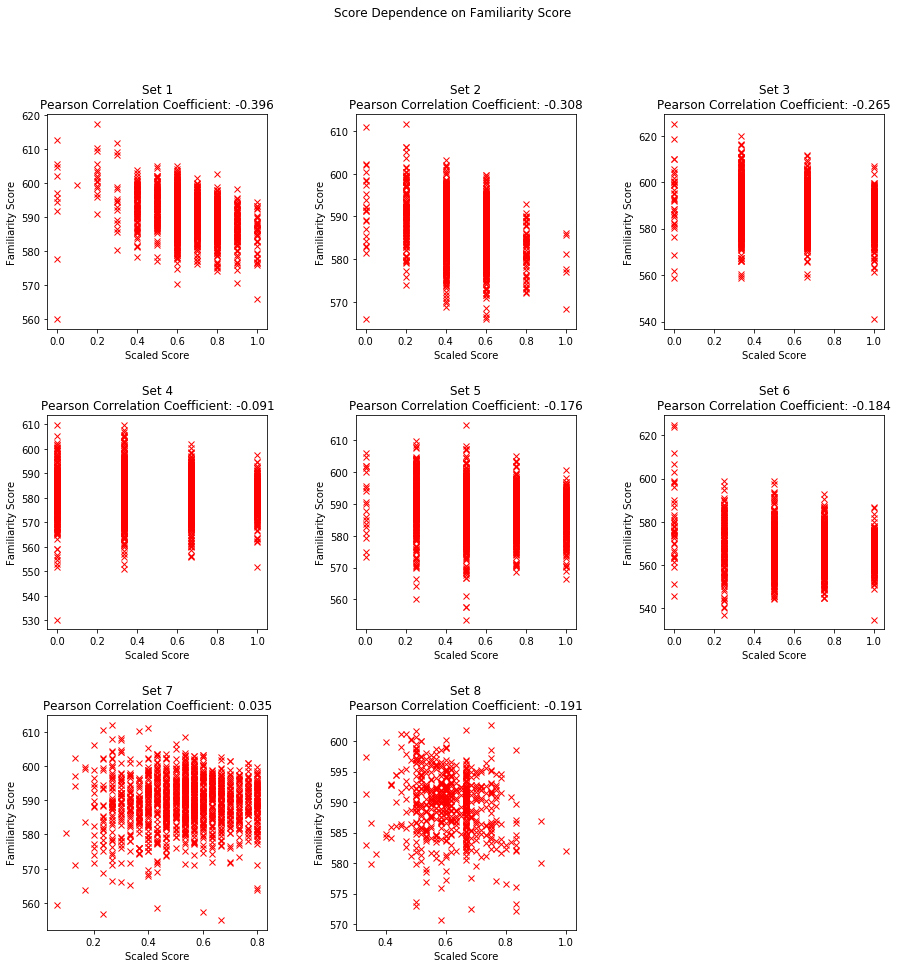

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Familiarity Score')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        familiarity_score = [df.iloc[i]['familiarityscore'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, familiarity_score , 'rx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Familiarity Score")
        correlation, p_val = pearsonr(scaled_scores, familiarity_score)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))


fig.delaxes(ax[2][2])
plt.show()

# Correlation between essay score and concreteness score

Calculates the word concreteness score by summing the word concreteness scores of words, and dividing the sum by the number of words in the given text that received a concreteness score.

Maximum is 670 from the instance of a text containing only the word "milk", which carries the highest concreteness score of 670 from the concreteness list. 

Minimum is 180 from the instance of a text containing only the word "of", which carries the lowest concreteness score of 180 from the concreteness list.


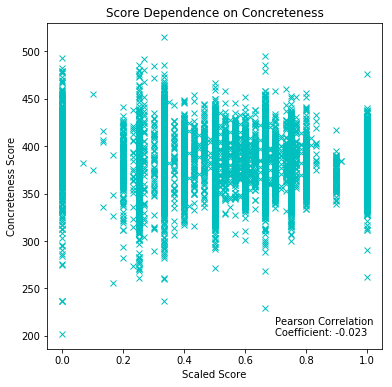

In [23]:
plt.plot(df['scaled_score'], df['concretenessscore'], 'cx')
plt.xlabel("Scaled Score")
plt.ylabel("Concreteness Score")
plt.title("Score Dependence on Concreteness")
correlation, p_val = pearsonr(df['scaled_score'], df['concretenessscore'])
plt.text(0.7, 200, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

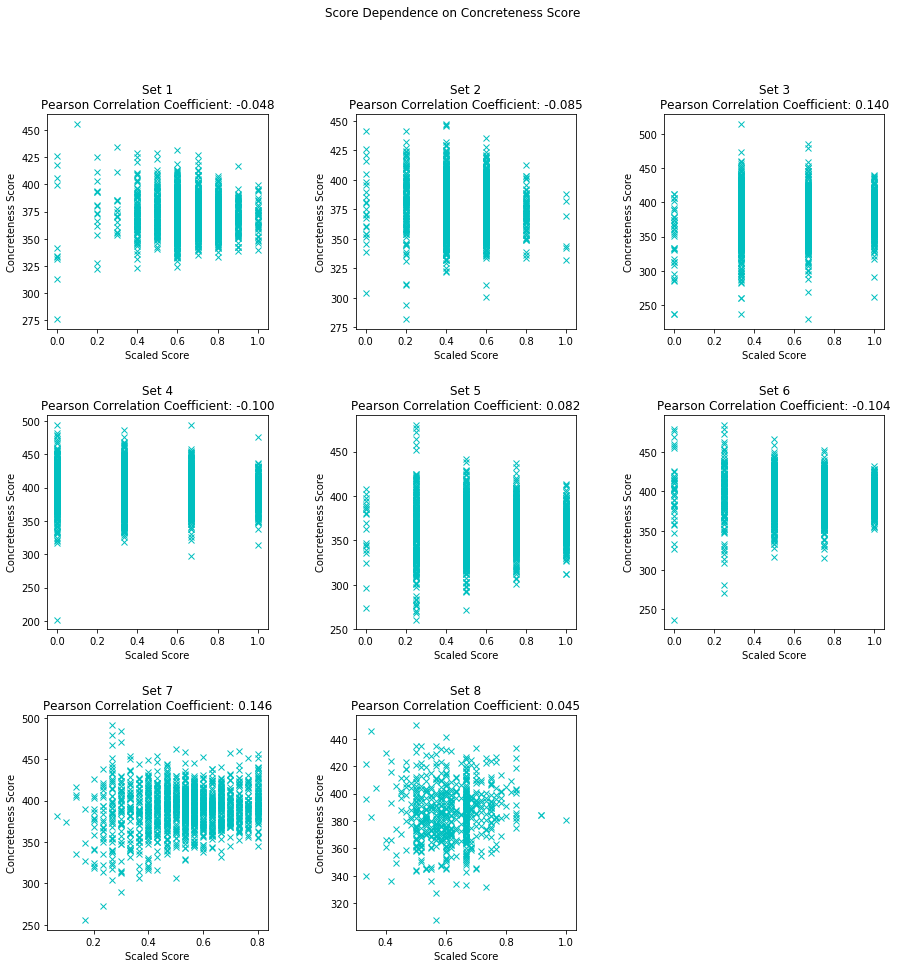

In [34]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Concreteness Score')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        concreteness_score = [df.iloc[i]['concretenessscore'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, concreteness_score , 'cx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Concreteness Score")
        correlation, p_val = pearsonr(scaled_scores, concreteness_score)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

# Correlation between essay score and imagability score

Calculates the word imagability score by summing the word imagability scores of words, and dividing the sum by the number of words in the given text that received a imagability score.

Maximum is 667 from the instance of a text containing only the word "beach", which carries the highest imagability score of 667 from the imagability list.

Minimum is 129 from the instance of a text containing only the word "plenipotentiary", which carries the lowest imagability score of 129 from the imagability list.              


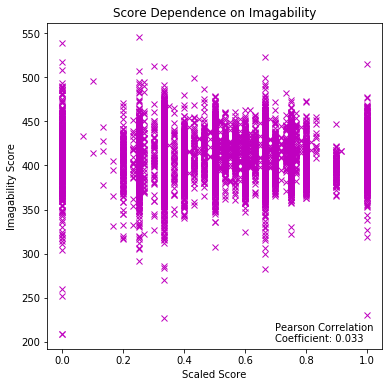

In [124]:
plt.plot(df['scaled_score'], df['imagabilityscore'], 'mx')
plt.xlabel("Scaled Score")
plt.ylabel("Imagability Score")
plt.title("Score Dependence on Imagability")
correlation, p_val = pearsonr(df['scaled_score'], df['imagabilityscore'])
plt.text(0.7, 200, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

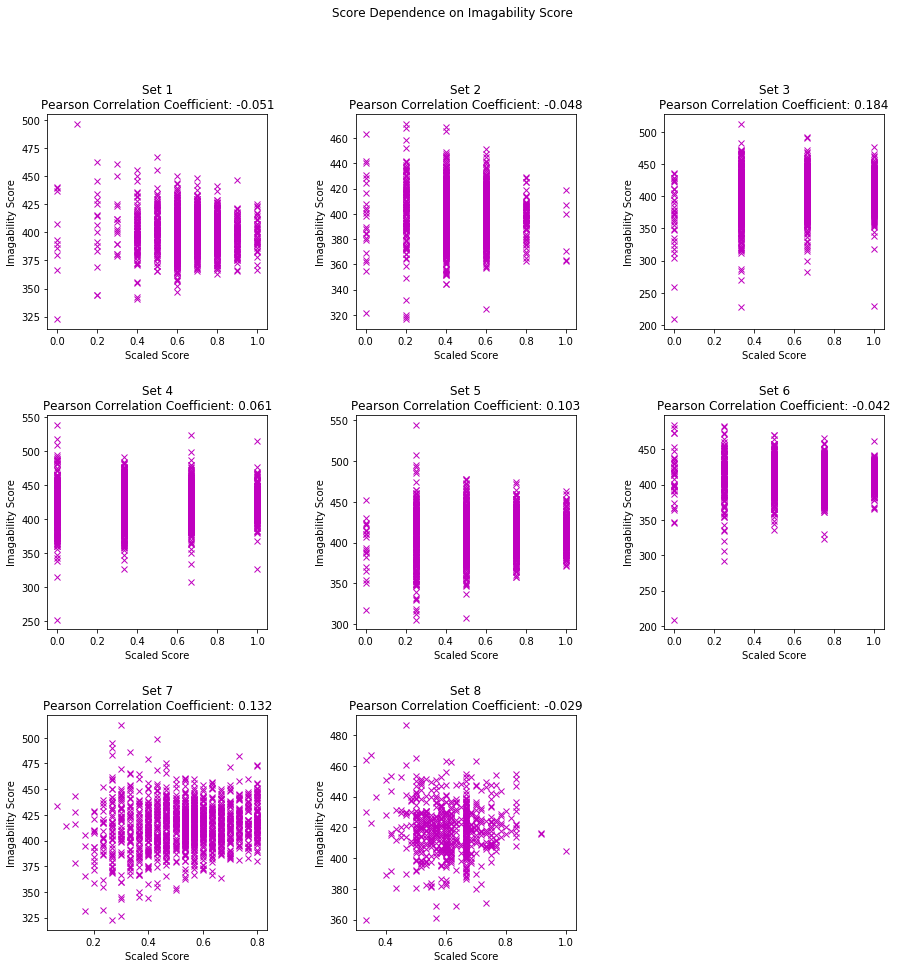

In [35]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Imagability Score')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        imagability_score = [df.iloc[i]['imagabilityscore'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, imagability_score , 'mx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Imagability Score")
        correlation, p_val = pearsonr(scaled_scores, imagability_score)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))


fig.delaxes(ax[2][2])
plt.show()

# Correlation between essay score and meaningfulness score

Calculates the word meaningfulness score (colorado norms) by summing the word meaningfulness scores of words, and dividing the sum by the number of words in the given text that received a meaningfulness score.

Maximum is 617 from the instance of a text containing only the word "beautiful" which carries the highest meaningfulness score of 617 from the meaningfulness list.

Minimum is 127 from the instance of a text containing only the word "limn", which carries the lowest word meaningfulness score of 127 from the word meaningfulness list.
   

In [128]:
[i for i in range(len(df)) if df.iloc[i]['meaningfulnesscscore']=='not applicable']

[5288]

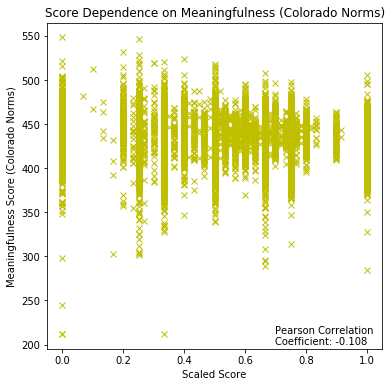

In [147]:
plt.plot(df['scaled_score'][:5288], df['meaningfulnesscscore'][:5288], 'yx')
plt.plot(df['scaled_score'][5289:], df['meaningfulnesscscore'][5289:], 'yx')
plt.xlabel("Scaled Score")
plt.ylabel("Meaningfulness Score (Colorado Norms)")
plt.title("Score Dependence on Meaningfulness (Colorado Norms)")
a = pd.concat([df['scaled_score'][:5288],df['scaled_score'][5289:]])
b = pd.concat([df['meaningfulnesscscore'][:5288],df['meaningfulnesscscore'][5289:]]).astype('float64')

correlation, p_val = pearsonr(a , b )
plt.text(0.7, 200, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

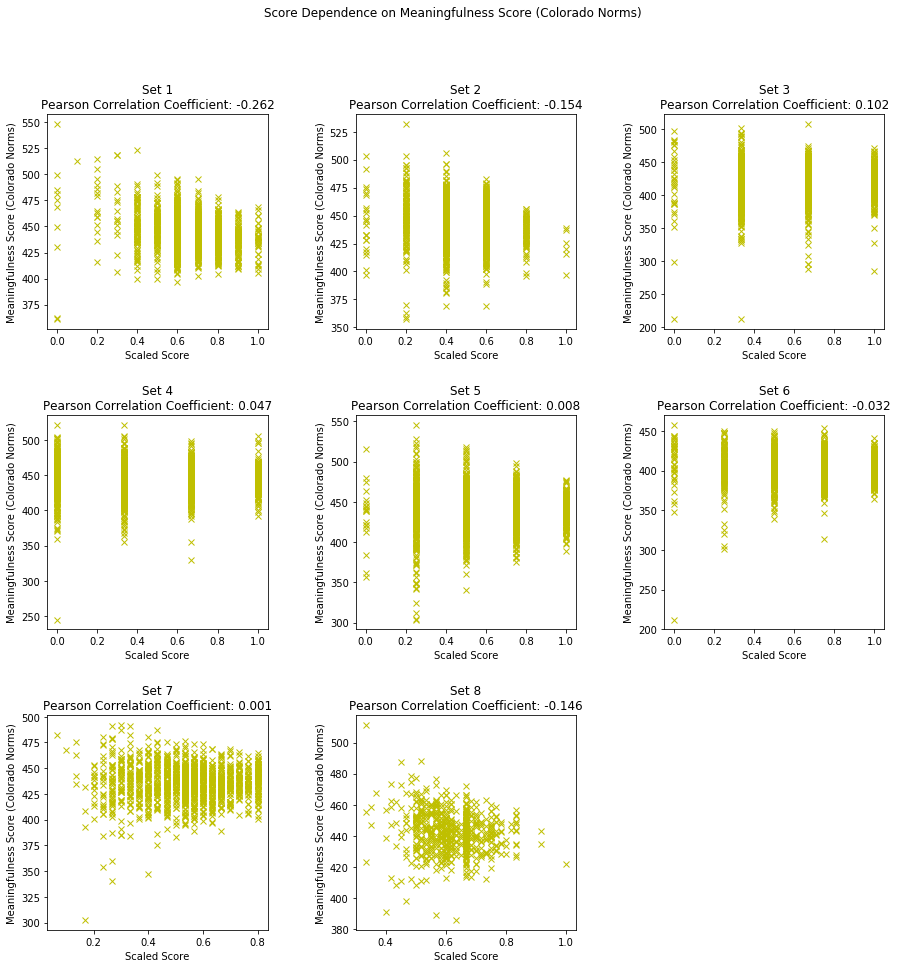

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Meaningfulness Score (Colorado Norms)')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j and i!=5288]
        meaningfulness_score = [df.iloc[i]['meaningfulnesscscore'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j and i!=5288]
        col.plot(scaled_scores, meaningfulness_score , 'yx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Meaningfulness Score (Colorado Norms)")
        meaningfulness_score = np.array(meaningfulness_score).astype(np.float)
        correlation, p_val = pearsonr(scaled_scores, meaningfulness_score)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

# Correlation between essay score and meaningfulness score (Paivio norms)

Calculates the word meaningfulness score (paivio norms)by summing the word meaningfulness scores of words, and dividing the sum by the number of words in the given text that received a meaningfulness score

Maximum is 696 from the instance of a text containing only the words "toy","tempest","sunset","policeman","metal","ink","daffodil","cradle","corn", and "boy" which all carry the highest meaningfulness score of 696 from the meaningfulness list

Minimum is 192 from the instance of a text containing only the word "debacle", which carries the lowest word meaningfulness score of 192 from the word meaningfulness list

In [151]:
len([i for i in range(len(df)) if df.iloc[i]['meaningfulnesspscore']=='not applicable'])

658

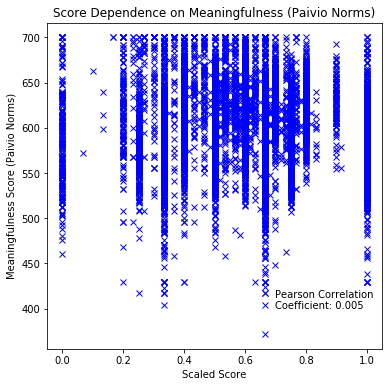

In [157]:

plt.xlabel("Scaled Score")
plt.ylabel("Meaningfulness Score (Paivio Norms)")
plt.title("Score Dependence on Meaningfulness (Paivio Norms)")
a = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['meaningfulnesspscore'] != 'not applicable']
b = [df.iloc[i]['meaningfulnesspscore'] for i in range(len(df)) if df.iloc[i]['meaningfulnesspscore'] != 'not applicable']
b=np.array(b).astype(np.float)
plt.plot(a,b, 'bx')
correlation, p_val = pearsonr(a , b )
plt.text(0.7, 400, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

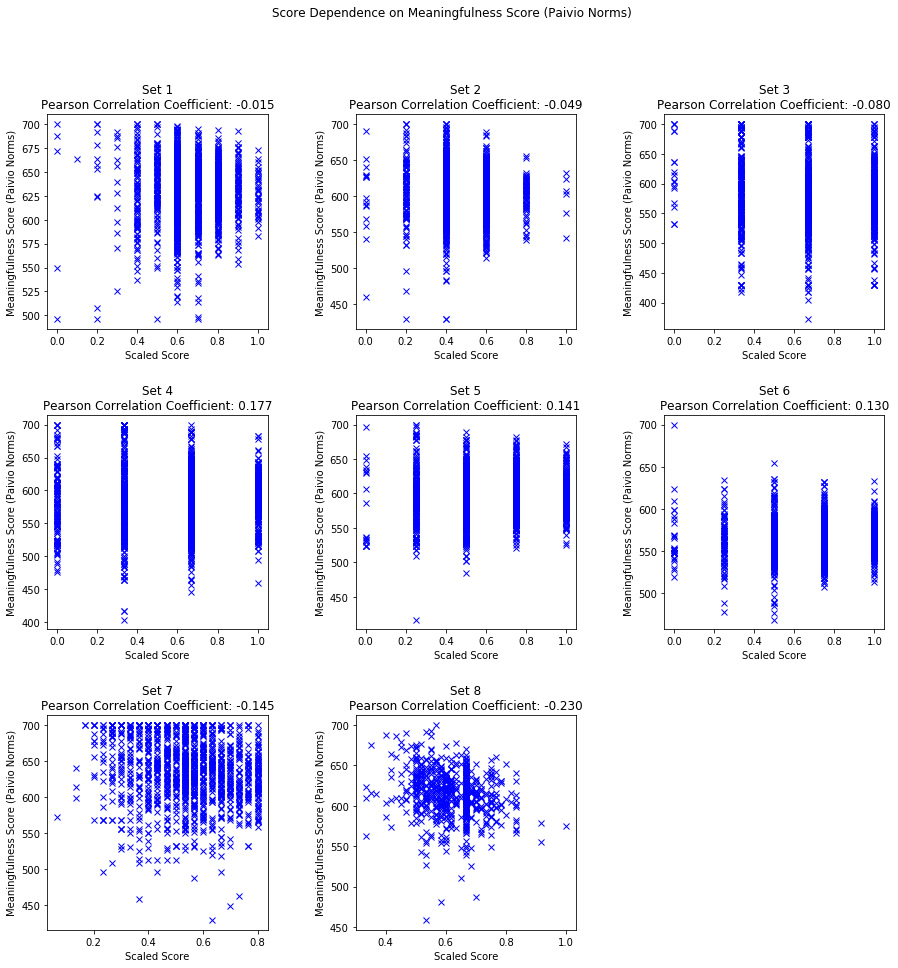

In [37]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Meaningfulness Score (Paivio Norms)')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j and df.iloc[i]['meaningfulnesspscore']!='not applicable']
        meaningfulness_score = [df.iloc[i]['meaningfulnesspscore'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j and  df.iloc[i]['meaningfulnesspscore']!='not applicable']
        meaningfulness_score = np.array(meaningfulness_score).astype(np.float)
        col.plot(scaled_scores, meaningfulness_score , 'bx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Meaningfulness Score (Paivio Norms)")
        
        correlation, p_val = pearsonr(scaled_scores, meaningfulness_score)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

# Correlation between essay score and age of acquisition score

Calculates the word age of acquisition score by summing the age of acquisition scores of words, and dividing the sum by the number of words in the given text that received an age of acquisition score

Maximum is 697 from the instance of a text containing only the words "astrolabe", "endosperm", and "plenipotentiary" which all carry the highest age of acquisition score of 697 from the age of acquisition list

Minimum is 144 from the instance of a text containing only the word "mother", which carries the lowest age of acquisition score of 144 from the age of acquisition list.

Reference: 100 x 1 [0-2 yrs] to 7 [13 on]

In [152]:
len([i for i in range(len(df)) if df.iloc[i]['ageofacquisitionscore']=='not applicable'])

101

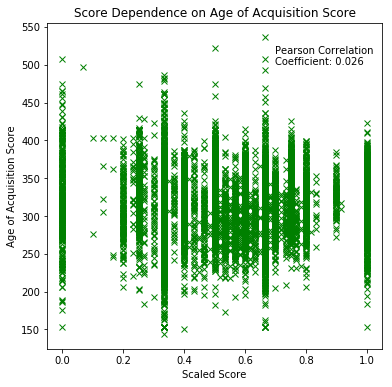

In [161]:

plt.xlabel("Scaled Score")
plt.ylabel("Age of Acquisition Score")
plt.title("Score Dependence on Age of Acquisition Score")
a = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['ageofacquisitionscore'] != 'not applicable']
b = [df.iloc[i]['ageofacquisitionscore'] for i in range(len(df)) if df.iloc[i]['ageofacquisitionscore'] != 'not applicable']
b=np.array(b).astype(np.float)
plt.plot(a,b, 'gx')
correlation, p_val = pearsonr(a , b )
plt.text(0.7, 500, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

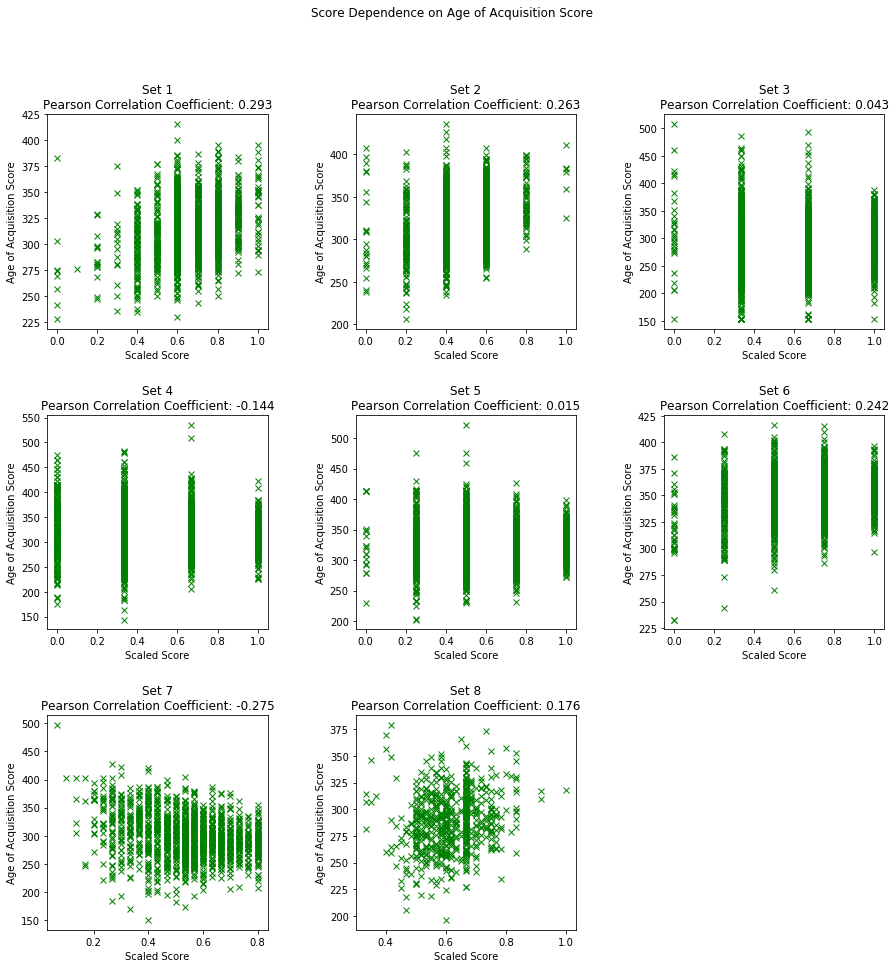

In [38]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Age of Acquisition Score')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j and df.iloc[i]['ageofacquisitionscore']!='not applicable']
        aoa_score = [df.iloc[i]['ageofacquisitionscore'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j and  df.iloc[i]['ageofacquisitionscore']!='not applicable']
        aoa_score = np.array(aoa_score).astype(np.float)
        col.plot(scaled_scores, aoa_score , 'gx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Age of Acquisition Score")
        
        correlation, p_val = pearsonr(scaled_scores, aoa_score)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

# Correlation between essay score and grammatical error rate

error rate = number of errors/number of words in text

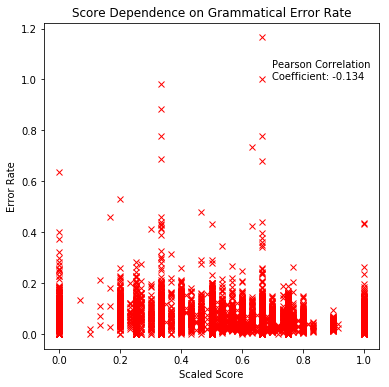

In [164]:
plt.plot(df['scaled_score'], df['errorrate'], 'rx')
plt.xlabel("Scaled Score")
plt.ylabel("Error Rate")
plt.title("Score Dependence on Grammatical Error Rate")
correlation, p_val = pearsonr(df['scaled_score'], df['errorrate'])
plt.text(0.7, 1, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

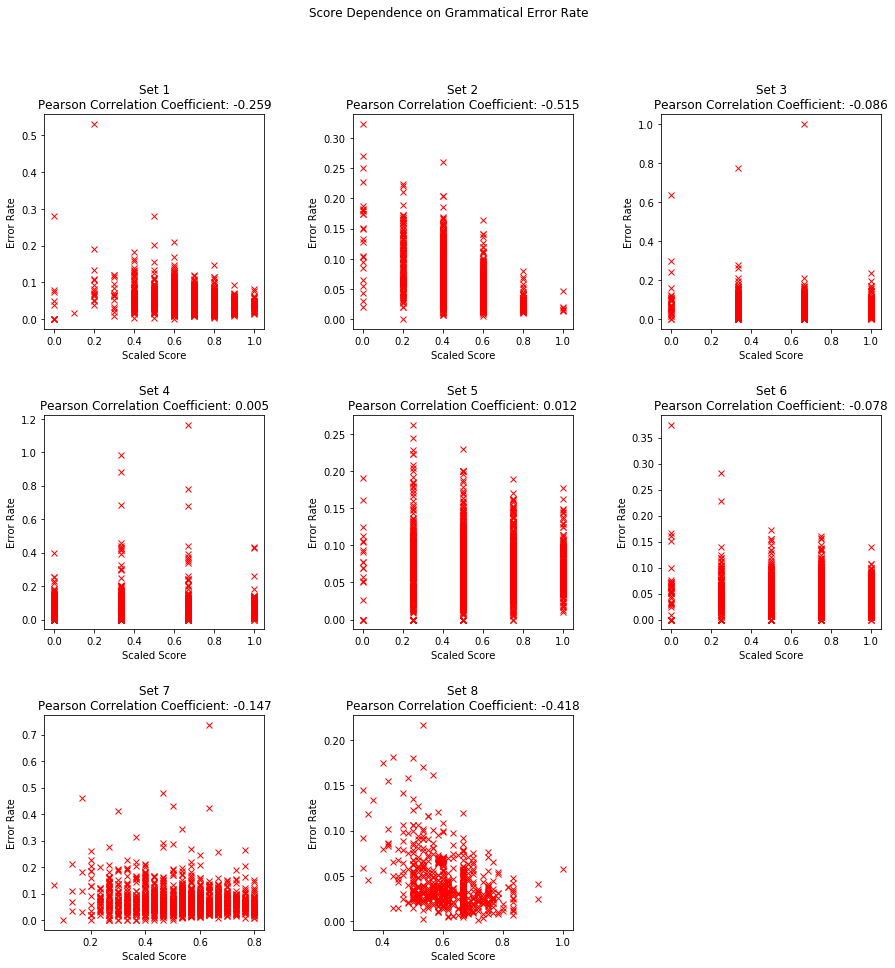

In [41]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Grammatical Error Rate')
j = 0
for row in ax:
    for col in row:
        j+=1
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        errorrate = [df.iloc[i]['errorrate'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, errorrate , 'rx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Error Rate")
        correlation, p_val = pearsonr(scaled_scores, errorrate)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

# Correlation between essay score and Flesch Reading Ease



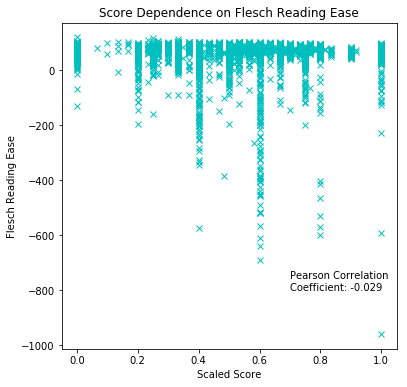

In [170]:
plt.plot(df['scaled_score'], df['flesch_reading_ease'], 'cx')
plt.xlabel("Scaled Score")
plt.ylabel("Flesch Reading Ease")
plt.title("Score Dependence on Flesch Reading Ease")
correlation, p_val = pearsonr(df['scaled_score'], df['flesch_reading_ease'])
plt.text(0.7, -800, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

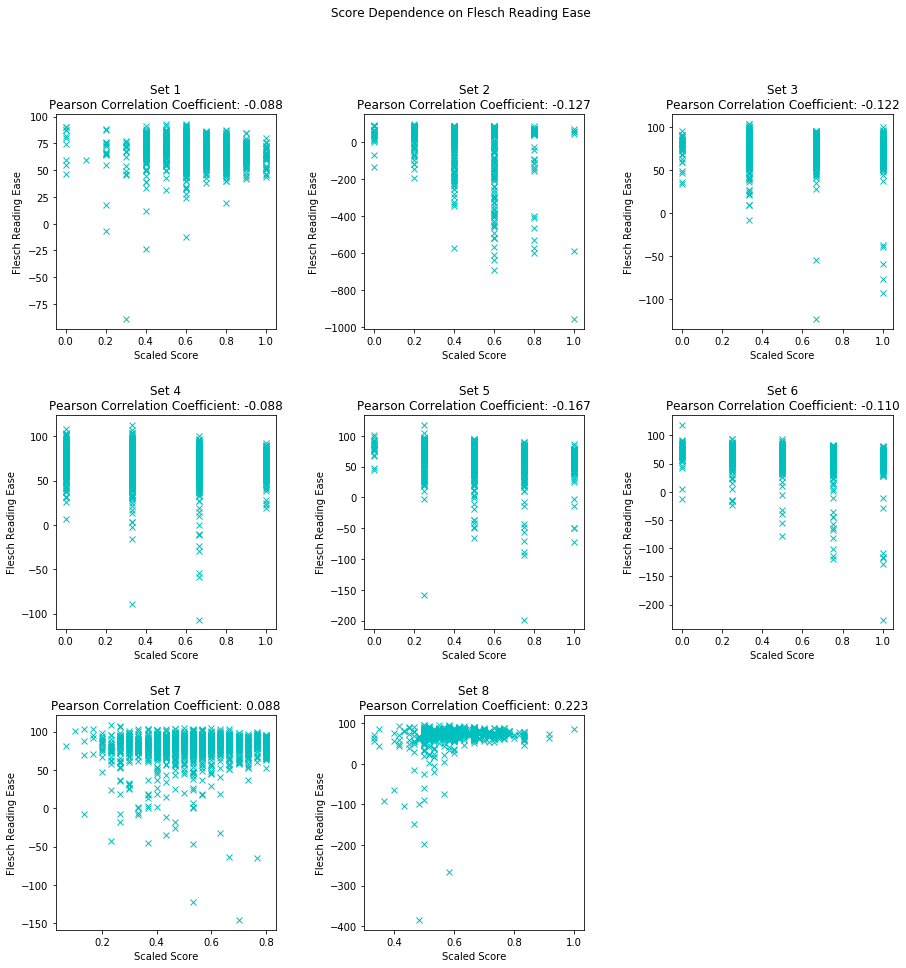

In [42]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Flesch Reading Ease')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        flesch_reading_ease = [df.iloc[i]['flesch_reading_ease'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, flesch_reading_ease , 'cx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Flesch Reading Ease")
        correlation, p_val = pearsonr(scaled_scores, flesch_reading_ease)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

# Correlation between essay score and Flesch Kincaid Grade Level


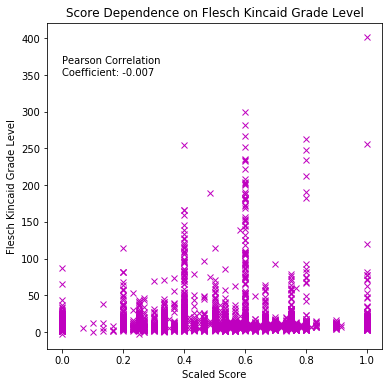

In [171]:
plt.plot(df['scaled_score'], df['flesch_kincaid_grade_level'], 'mx')
plt.xlabel("Scaled Score")
plt.ylabel("Flesch Kincaid Grade Level")
plt.title("Score Dependence on Flesch Kincaid Grade Level")
correlation, p_val = pearsonr(df['scaled_score'], df['flesch_kincaid_grade_level'])
plt.text(0, 350, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

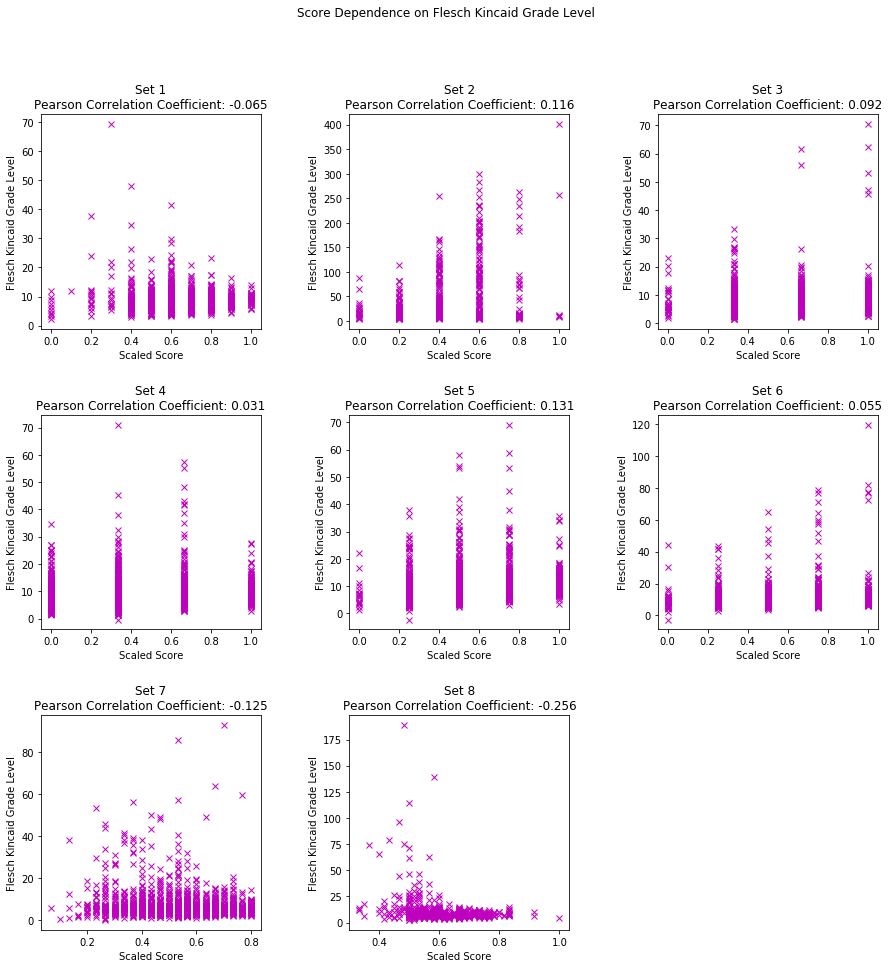

In [43]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Flesch Kincaid Grade Level')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        flesch_kincaid_grade_level = [df.iloc[i]['flesch_kincaid_grade_level'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, flesch_kincaid_grade_level , 'mx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Flesch Kincaid Grade Level")
        correlation, p_val = pearsonr(scaled_scores, flesch_kincaid_grade_level)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

# Correlation between essay score and SMOG Index

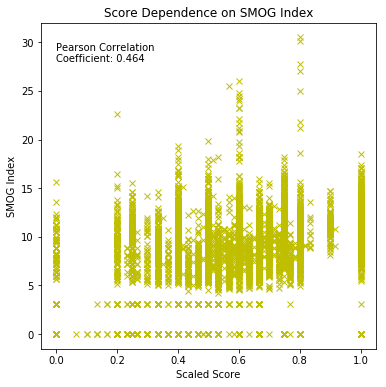

In [176]:
plt.plot(df['scaled_score'], df['smog'], 'yx')
plt.xlabel("Scaled Score")
plt.ylabel("SMOG Index")
plt.title("Score Dependence on SMOG Index")
correlation, p_val = pearsonr(df['scaled_score'], df['smog'])
plt.text(0, 28, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

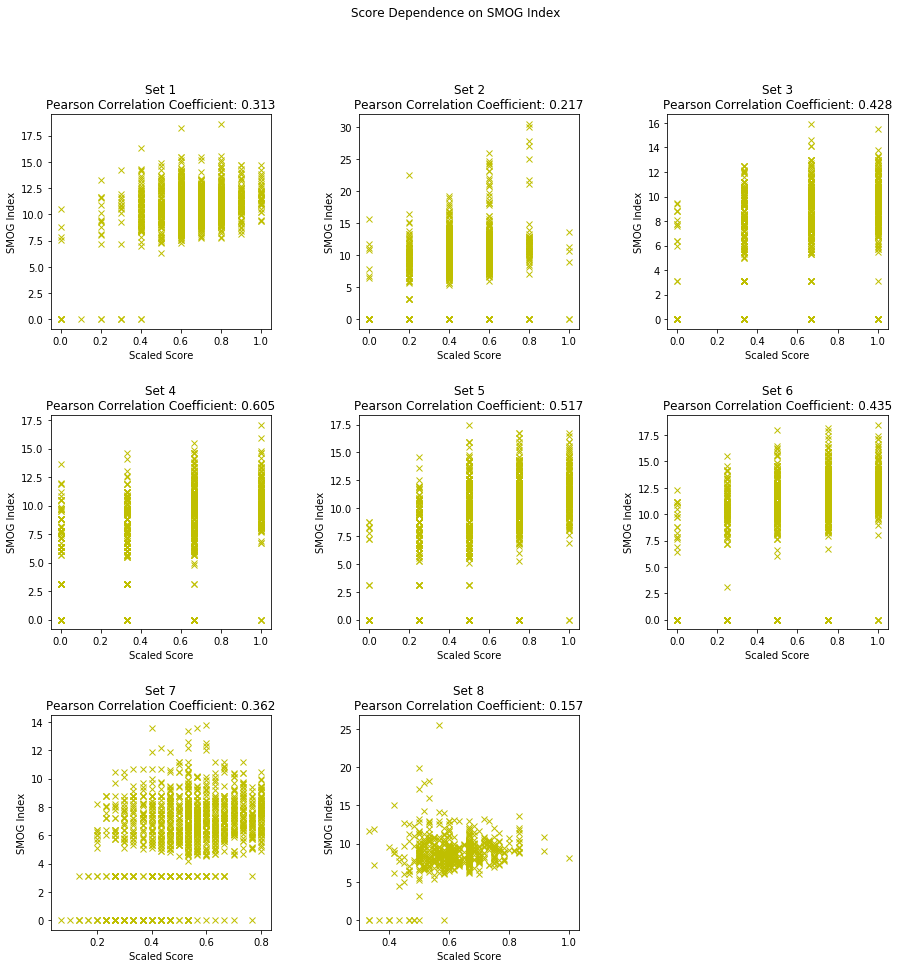

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on SMOG Index')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        smog = [df.iloc[i]['smog'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, smog , 'yx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("SMOG Index")
        correlation, p_val = pearsonr(scaled_scores, smog)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

# Correlation between essay score and Coleman-Liau Index

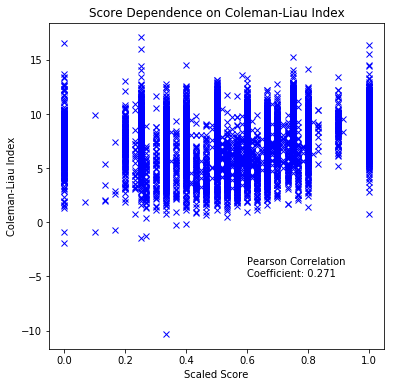

In [182]:
plt.plot(df['scaled_score'], df['coleman_liau'], 'bx')
plt.xlabel("Scaled Score")
plt.ylabel("Coleman-Liau Index")
plt.title("Score Dependence on Coleman-Liau Index")
correlation, p_val = pearsonr(df['scaled_score'], df['coleman_liau'])
plt.text(0.6, -5, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

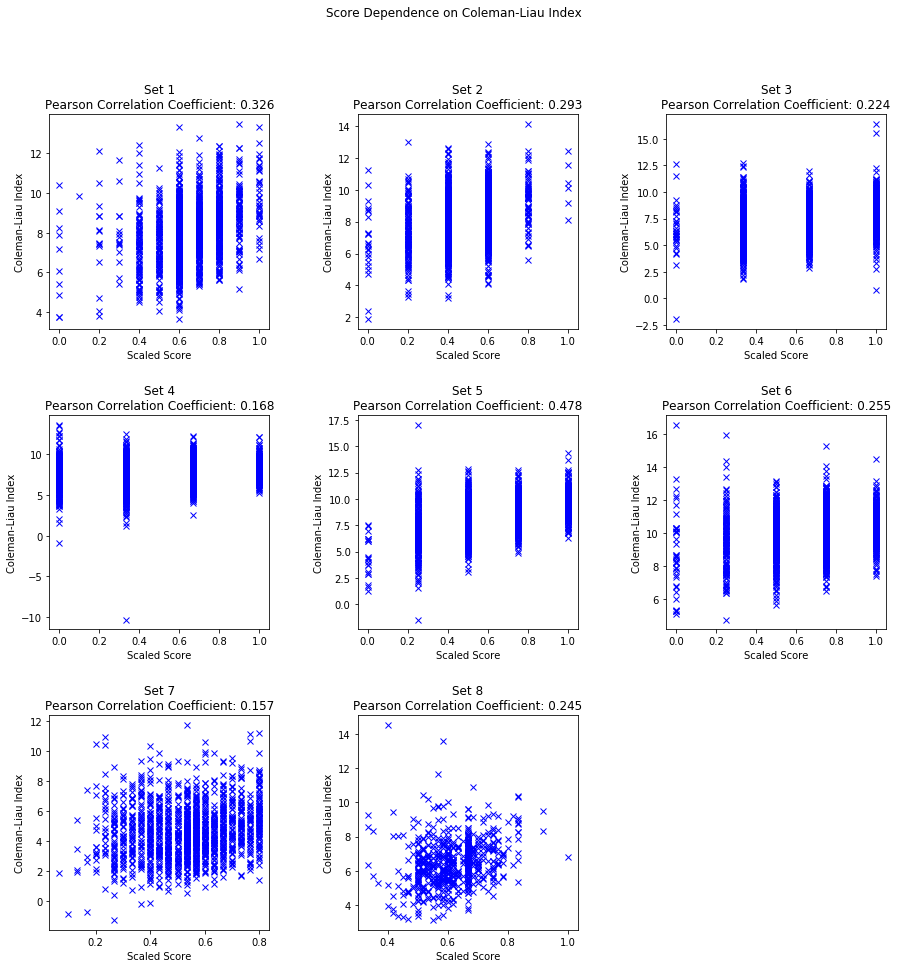

In [45]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Coleman-Liau Index')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        coleman_liau = [df.iloc[i]['coleman_liau'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, coleman_liau , 'bx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Coleman-Liau Index")
        correlation, p_val = pearsonr(scaled_scores, coleman_liau)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

# Correlation between essay score and Automated Readability Index

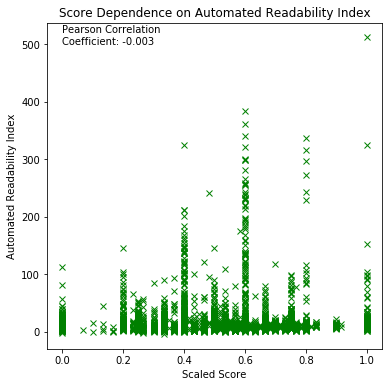

In [185]:
plt.plot(df['scaled_score'], df['ari'], 'gx')
plt.xlabel("Scaled Score")
plt.ylabel("Automated Readability Index")
plt.title("Score Dependence on Automated Readability Index")
correlation, p_val = pearsonr(df['scaled_score'], df['ari'])
plt.text(0, 500, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

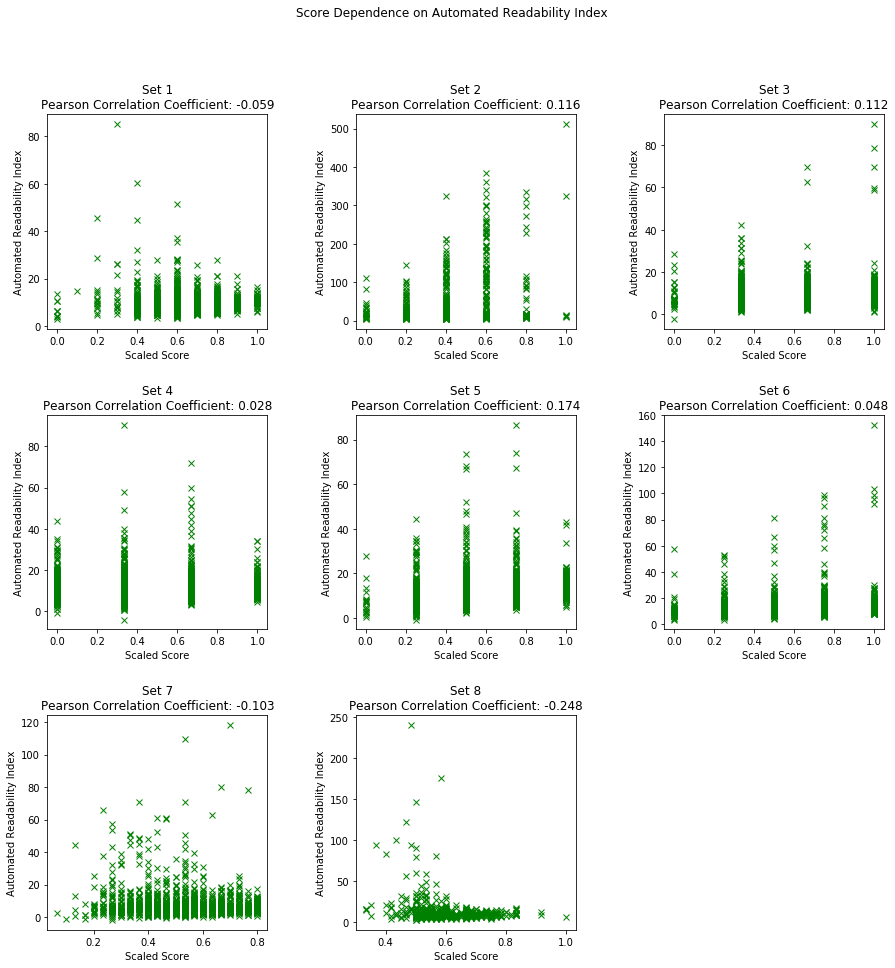

In [46]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Automated Readability Index')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        ari = [df.iloc[i]['ari'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, ari , 'gx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Automated Readability Index")
        correlation, p_val = pearsonr(scaled_scores, ari)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

# Correlation between essay score and Semantic Overlap

The total number of synonyms across the text.


### Without Normalizing by Length

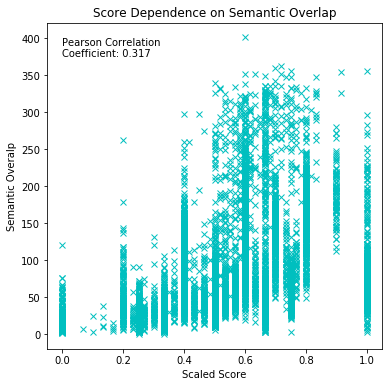

In [197]:
plt.plot(df['scaled_score'], df['semanticoverlap'], 'cx')
plt.xlabel("Scaled Score")
plt.ylabel("Semantic Overalp")
plt.title("Score Dependence on Semantic Overlap")
correlation, p_val = pearsonr(df['scaled_score'], df['semanticoverlap'])
plt.text(0, 375, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

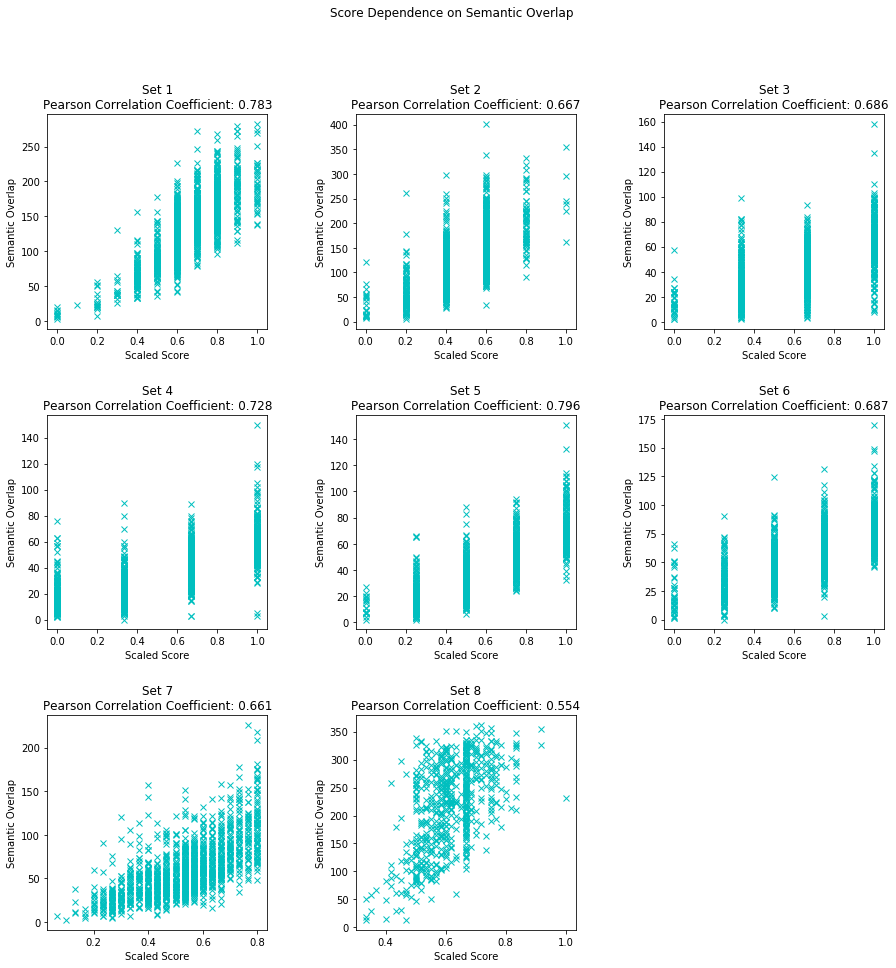

In [47]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Semantic Overlap')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        semanticoverlap = [df.iloc[i]['semanticoverlap'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, semanticoverlap , 'cx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Semantic Overlap")
        correlation, p_val = pearsonr(scaled_scores, semanticoverlap)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])
plt.show()

### After Normalizing by Length

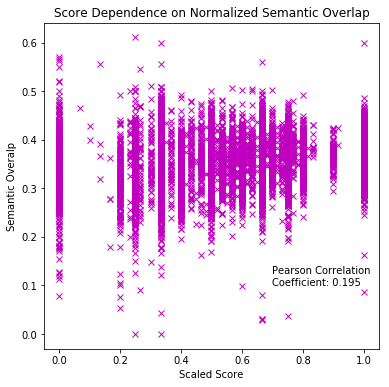

In [198]:
plt.plot(df['scaled_score'], df['semanticoverlap']/df['essay_length'], 'mx')
plt.xlabel("Scaled Score")
plt.ylabel("Semantic Overalp")
plt.title("Score Dependence on Normalized Semantic Overlap")
correlation, p_val = pearsonr(df['scaled_score'], df['semanticoverlap']/df['essay_length'])
plt.text(0.7, 0.1, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

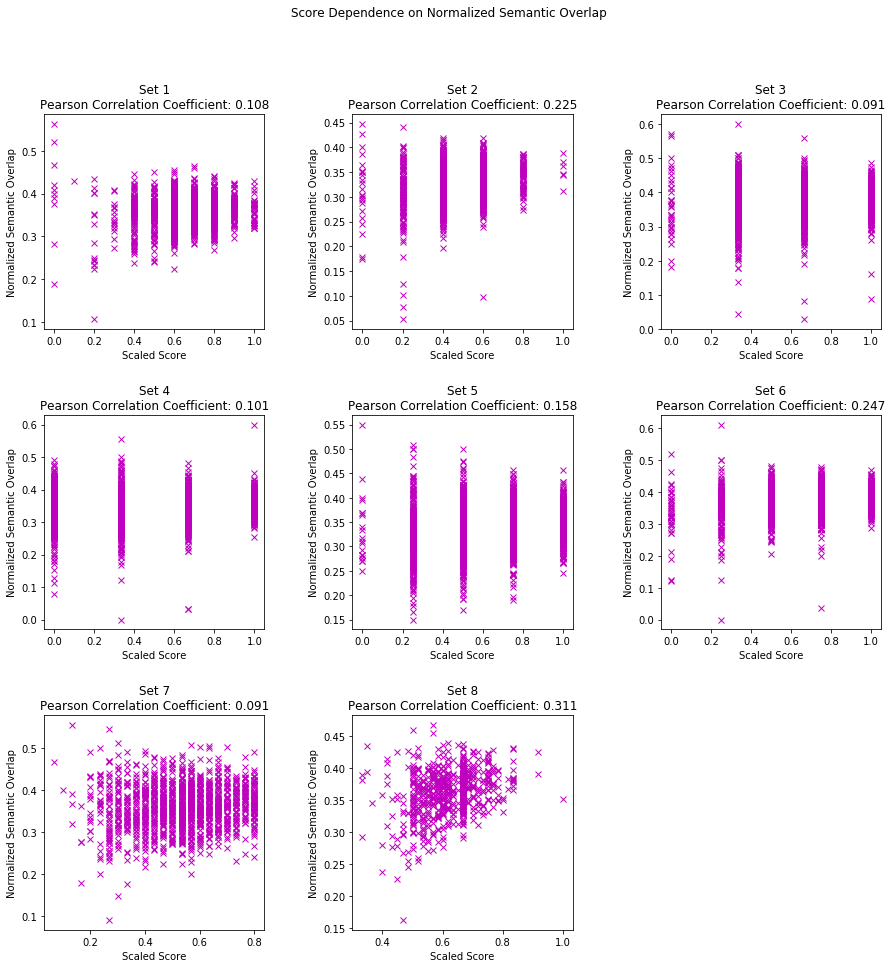

In [48]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Normalized Semantic Overlap')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        n_semanticoverlap = [df.iloc[i]['semanticoverlap']/df.iloc[i]['essay_length'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, n_semanticoverlap , 'mx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Normalized Semantic Overlap")
        correlation, p_val = pearsonr(scaled_scores, n_semanticoverlap)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])

plt.show()

# Correlation between essay score and mean Next Sentence Prediction

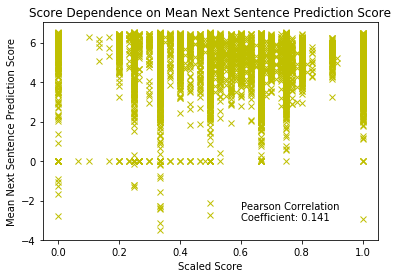

In [9]:
plt.plot(df['scaled_score'], df['nsp_score'], 'yx')
plt.xlabel("Scaled Score")
plt.ylabel("Mean Next Sentence Prediction Score")
plt.title("Score Dependence on Mean Next Sentence Prediction Score")
correlation, p_val = pearsonr(df['scaled_score'], df['nsp_score'])
plt.text(0.6, -3, "Pearson Correlation\nCoefficient: %.3f" %(correlation))
plt.show()

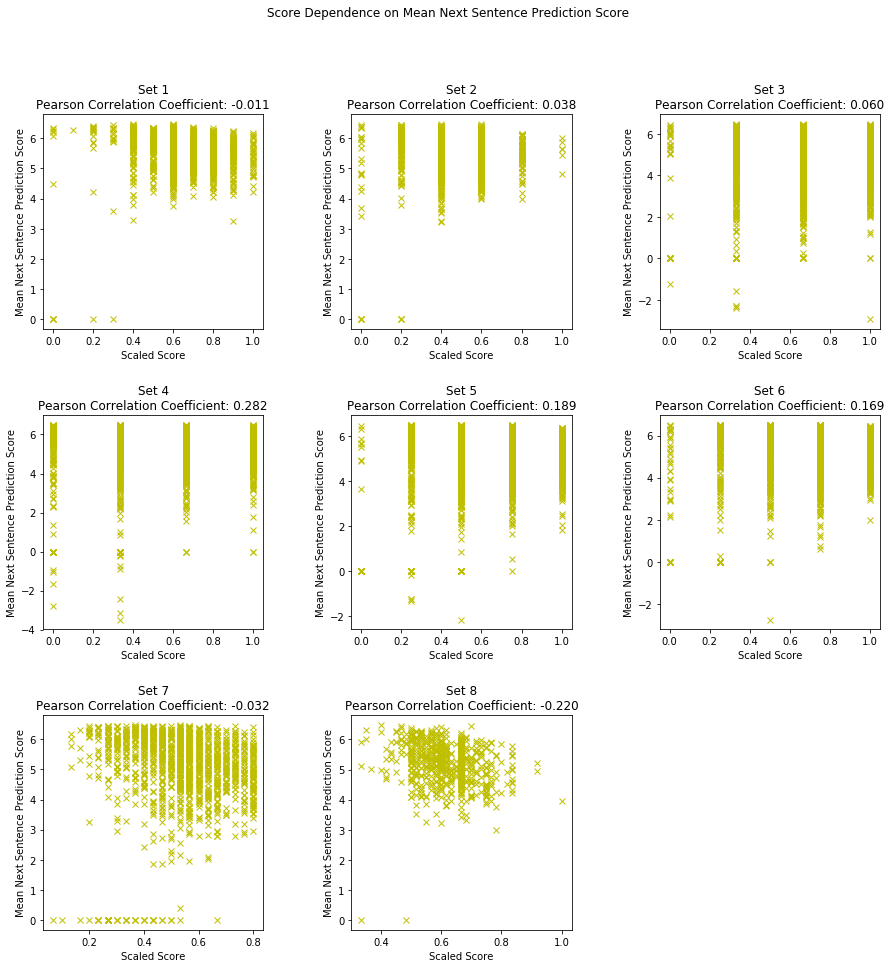

In [49]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
fig.suptitle('Score Dependence on Mean Next Sentence Prediction Score')
j = 0
for row in ax:
    for col in row:
        j+=1
        if j==9:
            break
        scaled_scores = [df.iloc[i]['scaled_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        nsp_score = [df.iloc[i]['nsp_score'] for i in range(len(df)) if df.iloc[i]['essay_set'] == j]
        col.plot(scaled_scores, nsp_score , 'yx')
        col.set_xlabel("Scaled Score")
        col.set_ylabel("Mean Next Sentence Prediction Score")
        correlation, p_val = pearsonr(scaled_scores, nsp_score)
        col.title.set_text("Set " + str(j) + "\nPearson Correlation Coefficient: %.3f" %(correlation))

fig.delaxes(ax[2][2])

plt.show()

In [171]:
n_semantic_overlap = [df['semanticoverlap']/df['essay_length']]

In [172]:
n_semantic_overlap[0].tolist()

[0.3,
 0.3,
 0.34234234234234234,
 0.3340471092077088,
 0.391304347826087,
 0.26153846153846155,
 0.32653061224489793,
 0.3803680981595092,
 0.35714285714285715,
 0.32432432432432434,
 0.40186915887850466,
 0.40869565217391307,
 0.3968253968253968,
 0.3770491803278688,
 0.39759036144578314,
 0.3888888888888889,
 0.20512820512820512,
 0.3948339483394834,
 0.3515625,
 0.3936545240893067,
 0.3597122302158273,
 0.3761904761904762,
 0.27,
 0.4696969696969697,
 0.38181818181818183,
 0.3316062176165803,
 0.35714285714285715,
 0.3278301886792453,
 0.37037037037037035,
 0.3605769230769231,
 0.38939670932358317,
 0.39664804469273746,
 0.29285714285714287,
 0.34649122807017546,
 0.38461538461538464,
 0.34615384615384615,
 0.3273809523809524,
 0.2987012987012987,
 0.4186046511627907,
 0.3217391304347826,
 0.3963963963963964,
 0.3576158940397351,
 0.3476190476190476,
 0.3884297520661157,
 0.35344827586206895,
 0.21212121212121213,
 0.3217821782178218,
 0.36893203883495146,
 0.4,
 0.35625,
 0.361702

In [173]:
df['n_semantic_overlap'] = n_semantic_overlap[0].tolist()

In [176]:
df1

essay_set                                              essay  \
0              7  One time I was patient was when I had to get s...   
1              5  I think the mood of the passage @ORGANIZATION1...   
2              5  The mood created by the author is a happy and ...   
3              3  The feature of the setting included nice cool ...   
4              6  While attempting to allow dirigibles to dock o...   
5              5  The author's mood is very grateful and happy. ...   
6              7  A wize man once said patience is a is a vertue...   
7              8   Laughter is indeed an important part of anyon...   
8              5  To me the mood of the author is happy. Thinks ...   
9              4  The author concluded the story with his paragr...   
10             4  I will take that test aGain. She has @CAPS1 co...   
11             2  I believe that certain materials such as books...   
12             4  The author concludes with this sentence becaus...   
13             7  Ive been to @LOCATION1 @CAPS1 before, my famil...   
14             7  This is my story about being patient, I close ...   
15             2  Reading is very popular. It is something to do...   
16             4  The author concludes this story with this para...   
17             4  Throughout this story we are given background ...   
18             6  The builders of the Empire State Building face...   
19             3  The @CAPS1 is affected in many ways. The major...   
20             2  Most people have been debating on whether or n...   
21             5  The mood created by the author in the memoir i...   
22             8                                                ...   
23             6  The builders of the Empire State Building face...   
24             1  Dear @CAPS1, I think computers aren't good for...   
25             1  @ORGANIZATION1, In today's age computers are s...   
26             3  @CAPS1 directions, June, lack of water all are...   
27             7  A time I was patient was waiting @NUM1 to @NUM...   
28             6  The idea of using a mooring mast in order to a...   
29             6  There were many obstacles that the builders of...   
...          ...                                                ...   
11648          3  In the essay Rough Road Ahead: Do not exceed S...   
11649          5  In the memoir the author obviously seems to be...   
11650          3  The affects of the features around them affect...   
11651          3  The setting is in a California which isnt real...   
11652          2  In @DATE1's world there are so many things aro...   
11653          1  Dear @CAPS1, @CAPS2 are not bad for society. T...   
11654          1  I think we need our computers. If we dont have...   
11655          6  In the excerpt "The Mooring Mast" by @ORGANIZA...   
11656          2  The way that the books, musics ,ect. are made ...   
11657          6  In the excerpt The Mooring Mast by Marcia Amid...   
11658          5                                The mood was great.   
11659          8   Emotions are an essential part of life. Some ...   
11660          3  The setting of Rough Road Ahead: Do Not Exceed...   
11661          1  Dear Newspaper @CAPS1, I believe computers and...   
11662          1  To whom it @MONTH1 concern: I will agree that ...   
11663          7  @CAPS1 was a beautifal morning, sky was blue, ...   
11664          6  The architects and builders of the Empire Stat...   
11665          7  One time I had to be very pationt. I had two w...   
11666          5  The mood created by the author in the memoir t...   
11667          1  Dear @CAPS1, @CAPS2t you think computers help ...   
11668          8  It's true @CAPS8 they say, time flies when you...   
11669          5  Throughout this memoir the mood was very reali...   
11670          4  The author concludes the story with this parag...   
11671          1  Dear @ORGANIZATION1 @ORGANIZATION1 @ORGANIZATI...   
11672          4  What the auth

In [178]:
full_df = pd.concat([df, df1])
print(full_df)

       essay_set                                              essay  \
0              6  The obstacles the builders of the empire state...   
1              5  The mood shows that Narciso loves his family v...   
2              3  When the cyclist is in the serenity of an earl...   
3              2  Have you ever had a book, movie, or magazine o...   
4              4  The author concludes the story with this sente...   
5              6  In the excerpt The Mooring Mast by Marcia Amid...   
6              3  The  cyclist  runs  into some pretty tough cha...   
7              6  The obstacles The @CAPS1 of the Empire State b...   
8              7  One boring old rainy afternoon I asked my mom ...   
9              7  Have you ever had enough patients to deal with...   
10             6  Based on the excerpt, "The Mooring Mast", it i...   
11             6  In a desperate attempt to revolutionize the wa...   
12             3  The setting affected the cyclist because of th...   
13    

In [179]:
full_df

essay_set                                              essay  \
0              6  The obstacles the builders of the empire state...   
1              5  The mood shows that Narciso loves his family v...   
2              3  When the cyclist is in the serenity of an earl...   
3              2  Have you ever had a book, movie, or magazine o...   
4              4  The author concludes the story with this sente...   
5              6  In the excerpt The Mooring Mast by Marcia Amid...   
6              3  The  cyclist  runs  into some pretty tough cha...   
7              6  The obstacles The @CAPS1 of the Empire State b...   
8              7  One boring old rainy afternoon I asked my mom ...   
9              7  Have you ever had enough patients to deal with...   
10             6  Based on the excerpt, "The Mooring Mast", it i...   
11             6  In a desperate attempt to revolutionize the wa...   
12             3  The setting affected the cyclist because of th...   
13             4  The reason why the author of the story ended t...   
14             5  The author, @PERSON1 created a mood in the mem...   
15             3  When the cyclist first starts his journey he i...   
16             5  Narciso Rodriguez was very grateful for what h...   
17             1  Dear @CAPS1 @CAPS2, Have you ever spent more t...   
18             1  Everyone loves staying on the computer. I woul...   
19             8   @CAPS6 only happened a few weeks ago on a day...   
20             6  The @CAPS1 had many obstacles Building the Emp...   
21             6  In the excerpt "The Mooring Mast" by @ORGANIZA...   
22             6  Based on the article "The Mooring Mast" by Mar...   
23             3  @CAPS1   the  story  the  condition of  proble...   
24             4  The author concluded this paragraph in this st...   
25             5  The mood created in The memoir was based off h...   
26             7  One time I was patient was at the doctor, caus...   
27             8   It is often said that laughter can bring peop...   
28             1  some people learn about far away places, getti...   
29             1  Hello @CAPS1 @CAPS2, @CAPS3 you think computer...   
...          ...                                                ...   
11648          3  In the essay Rough Road Ahead: Do not exceed S...   
11649          5  In the memoir the author obviously seems to be...   
11650          3  The affects of the features around them affect...   
11651          3  The setting is in a California which isnt real...   
11652          2  In @DATE1's world there are so many things aro...   
11653          1  Dear @CAPS1, @CAPS2 are not bad for society. T...   
11654          1  I think we need our computers. If we dont have...   
11655          6  In the excerpt "The Mooring Mast" by @ORGANIZA...   
11656          2  The way that the books, musics ,ect. are made ...   
11657          6  In the excerpt The Mooring Mast by Marcia Amid...   
11658          5                                The mood was great.   
11659          8   Emotions are an essential part of life. Some ...   
11660          3  The setting of Rough Road Ahead: Do Not Exceed...   
11661          1  Dear Newspaper @CAPS1, I believe computers and...   
11662          1  To whom it @MONTH1 concern: I will agree that ...   
11663          7  @CAPS1 was a beautifal morning, sky was blue, ...   
11664          6  The architects and builders of the Empire Stat...   
11665          7  One time I had to be very pationt. I had two w...   
11666          5  The mood created by the author in the memoir t...   
11667          1  Dear @CAPS1, @CAPS2t you think computers help ...   
11668          8  It's true @CAPS8 they say, time flies when you...   
11669          5  Throughout this memoir the mood was very reali...   
11670          4  The author concludes the story with this parag...   
11671          1  Dear @ORGANIZATION1 @ORGANIZATION1 @ORGANIZATI...   
11672          4  What the auth

In [180]:
full_df.to_csv("full_data_with_grammar_with_NSP_nso.tsv", sep='\t',index=False)

In [14]:
import seaborn as sns

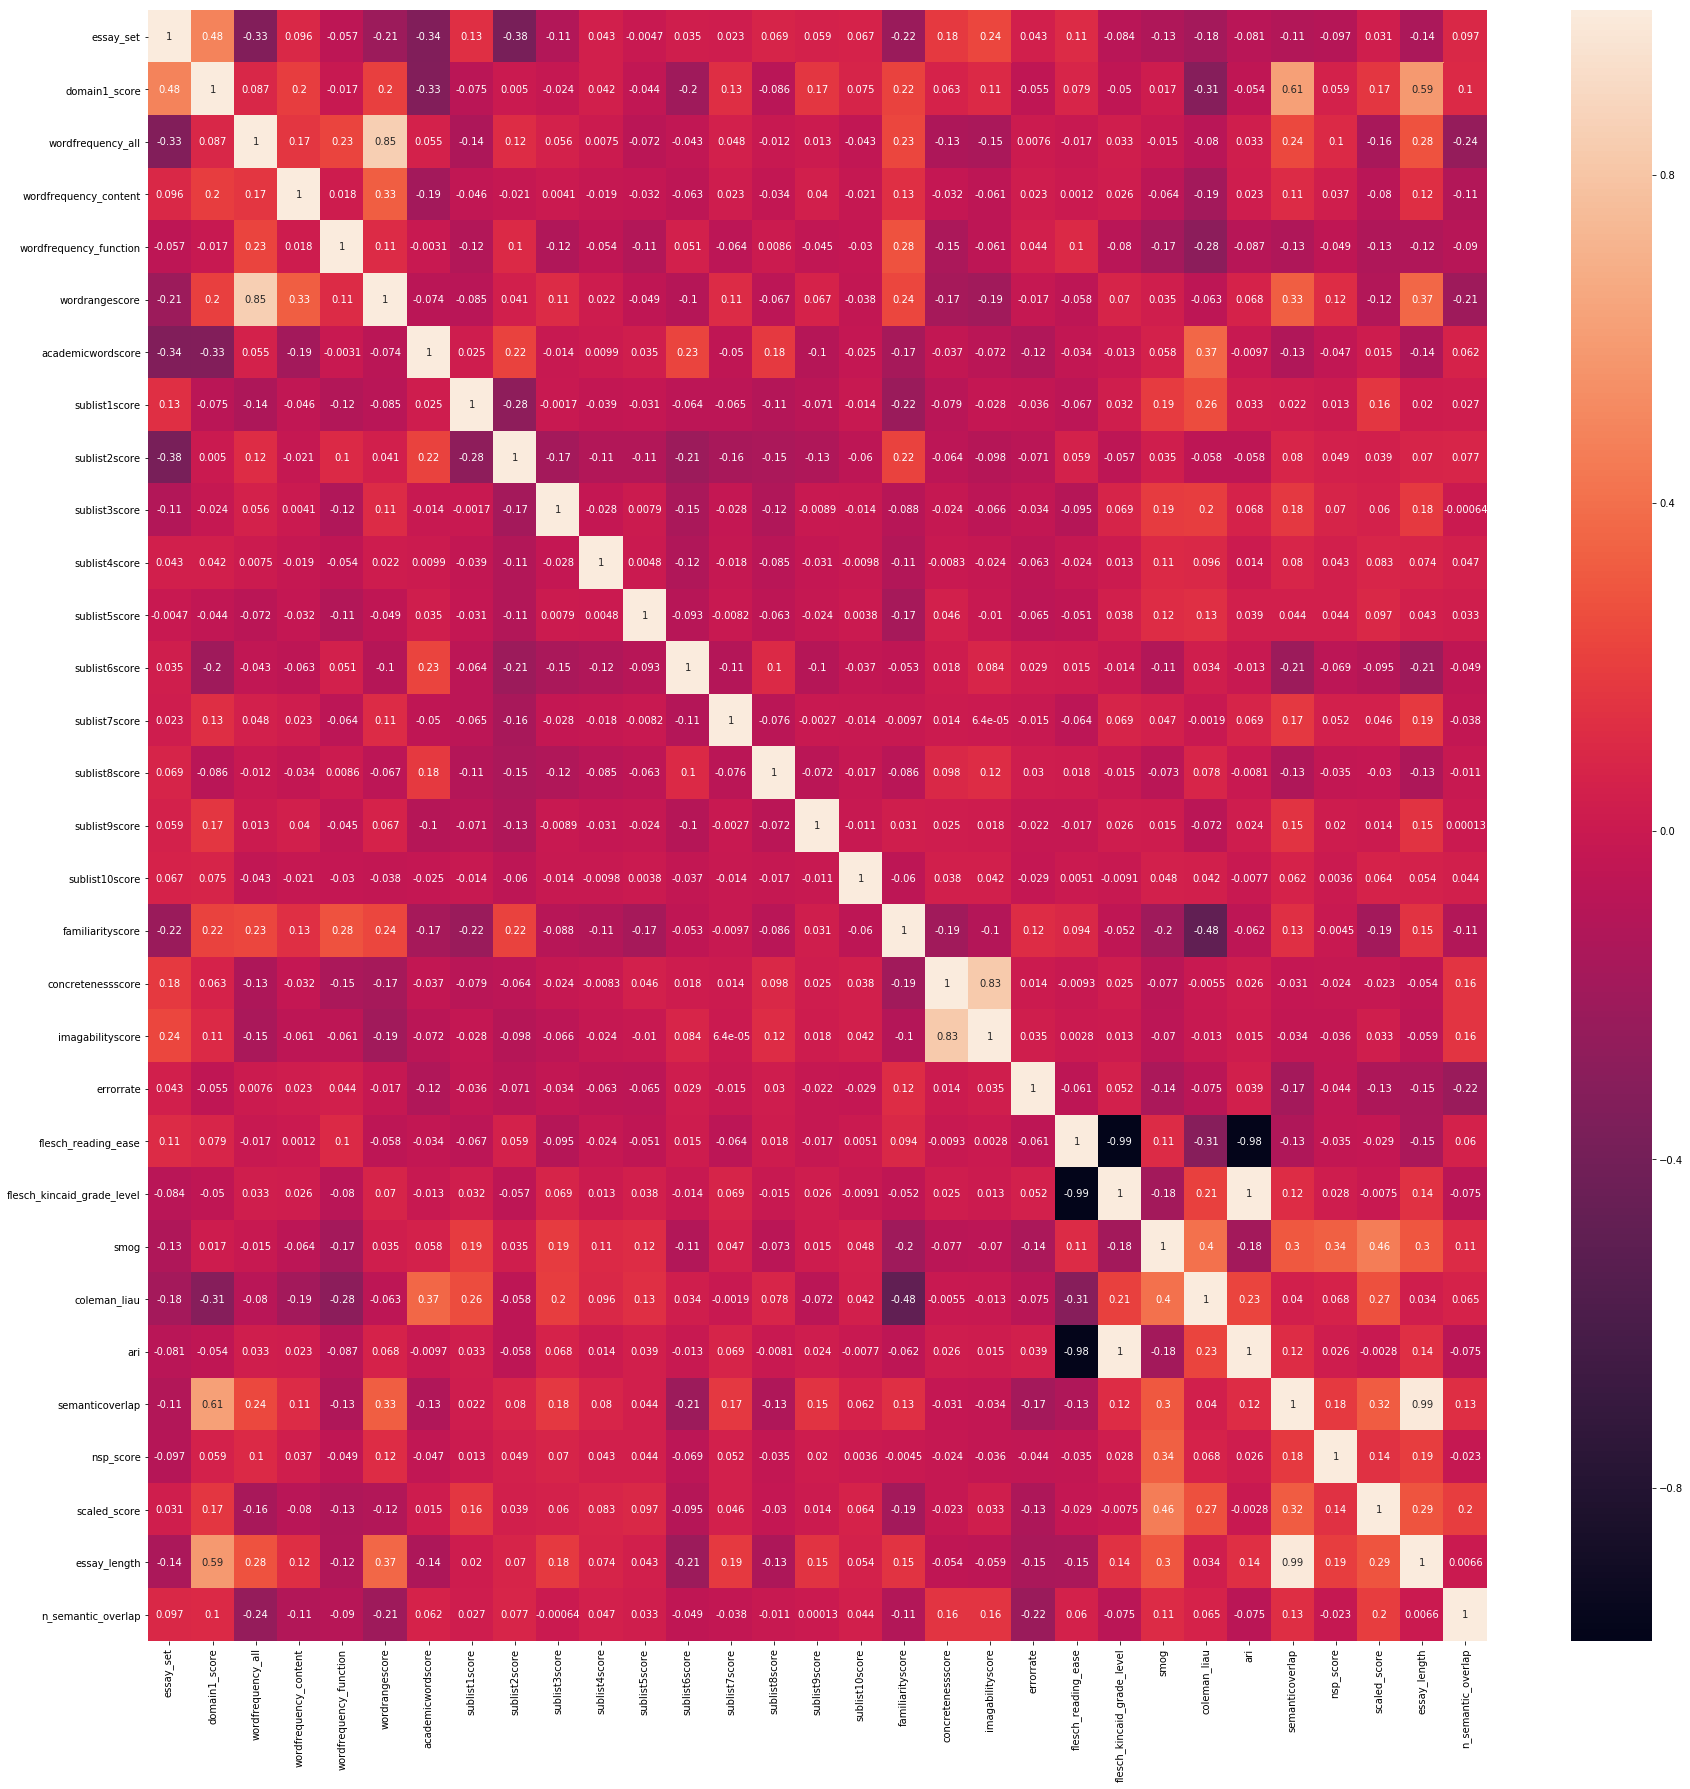

In [49]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot = True)


In [50]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import History 
from keras.utils import plot_model
from keras.optimizers import SGD

Using TensorFlow backend.


In [118]:
model = Sequential()
model.add(Dense(768, activation='tanh'))
model.add(Dense(1, activation = 'sigmoid'))

In [119]:
model

In [120]:
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mean_squared_error'])

In [121]:
x = pd.concat([df['wordfrequency_all'], df['wordfrequency_function'] ,df['wordrangescore'],df['sublist1score'],df['familiarityscore'],df['errorrate'],df['smog'],df['coleman_liau'],df['semanticoverlap'],df['n_semantic_overlap'],df['essay_length'],df['nsp_score']], axis = 1)
y = df['scaled_score']

In [122]:
x

wordfrequency_all  wordfrequency_function  wordrangescore  \
0           21214.164251            94955.732877      438.565217   
1           16117.000000           134569.921569      377.155844   
2            7267.148148           101358.938462      221.324074   
3            2314.089888           122759.516129      151.528090   
4            4751.833333            72384.966102      218.935185   
5            7468.382979            79375.361702      204.404255   
6           19463.178862           152264.253012      314.317073   
7           16599.547315            94712.551867      469.705882   
8            6547.571429           112152.940000      288.571429   
9           47681.202247           203781.500000      565.606742   
10          47897.451613           157715.105263      509.193548   
11          50498.875000           107436.744186      745.090000   
12          37415.864865           159210.714286      501.702703   
13          20270.260870           103364.378378      392.226087   
14          21449.151515           112012.589552      345.333333   
15          33870.346870           107848.876033      517.363790   
16          26906.046512            83562.672727      345.395349   
17          36532.664234           149913.228916      446.116788   
18          14870.608333            71052.837838      273.600000   
19           8599.108108           108451.813953      315.418919   
20          46185.973094            91883.313333      701.475336   
21           9374.337662            70912.363636      265.357143   
22          36141.592593           114271.669231      631.439815   
23          15258.954955           130759.119403      278.090090   
24          42586.731343           132108.412587      498.970149   
25          37527.767372           110729.741573      494.984894   
26          20909.025316           110228.711538      479.797468   
27           5607.814815           223950.411765      216.222222   
28          14176.994429            60939.306667      323.935933   
29          10422.426471            79377.776119      331.377451   
...                  ...                     ...             ...   
11648       24823.000000           141455.016393      453.836957   
11649        6851.347826           110464.550459      327.005435   
11650       40025.185185            68445.406250      617.296296   
11651       29119.583333           178294.714286      285.750000   
11652       37878.215938            96522.599190      604.755784   
11653       33751.307203           125706.625442      415.103814   
11654       47303.965300           112205.781095      590.911672   
11655       17352.928205            74477.763052      358.233333   
11656       19291.127273            72385.516129      396.436364   
11657       22852.628788           124850.637681      407.075758   
11658           1.666667           839964.000000        1.666667   
11659       31138.820000           108569.694268      514.020000   
11660       11081.571429           120666.513889      192.706349   
11661       44706.761702           110245.992248      597.863830   
11662       35534.129973           108566.034483      486.159151   
11663       19109.671642            58438.903704      427.084577   
11664       15074.361702            73777.390244      361.879433   
11665       41406.689655           132585.032258      741.327586   
11666       23792.545455            52589.750000      477.218182   
11667       32435.994413            81931.663158      525.522346   
11668       25157.542429            87497.869018      423.891847   
11669       27377.475410           162785.841667      486.163934   
11670       26453.233645           128231.186441      348.504673   
11671       40169.991266            93449.600000      497.903930   
11672       15787.646552           162381.539474      311.750000   
11673       15830.764706            60489.238095      268.260504   
11674        4953.572917            55292.654545      265.61458

In [165]:
y

0        0.766667
1        0.500000
2        0.500000
3        0.666667
4        0.750000
5        0.500000
6        0.666667
7        0.650000
8        0.250000
9        0.666667
10       0.333333
11       0.400000
12       0.333333
13       0.533333
14       0.533333
15       0.600000
16       0.333333
17       1.000000
18       0.750000
19       0.666667
20       0.200000
21       0.750000
22       0.416667
23       0.500000
24       0.600000
25       0.700000
26       0.666667
27       0.600000
28       1.000000
29       0.750000
           ...   
11648    0.333333
11649    1.000000
11650    0.333333
11651    0.333333
11652    0.600000
11653    0.800000
11654    0.500000
11655    1.000000
11656    0.200000
11657    0.750000
11658    0.250000
11659    0.616667
11660    1.000000
11661    0.500000
11662    0.800000
11663    0.733333
11664    0.750000
11665    0.300000
11666    0.250000
11667    0.600000
11668    0.700000
11669    0.750000
11670    0.666667
11671    0.600000
11672    0

In [123]:
hist = History()

In [124]:
model.fit(x.values, y.values, epochs = 100, validation_split = .1, callbacks = [hist])

Train on 10510 samples, validate on 1168 samples
Epoch 1/100
10510/10510 [==============================] - 1s 121us/step - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.0513 - val_mean_squared_error: 0.0513
Epoch 2/100
10510/10510 [==============================] - 1s 92us/step - loss: 0.0569 - mean_squared_error: 0.0569 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 3/100
10510/10510 [==============================] - 1s 89us/step - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.0501 - val_mean_squared_error: 0.0501
Epoch 4/100
10510/10510 [==============================] - 1s 90us/step - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.0551 - val_mean_squared_error: 0.0551
Epoch 5/100
10510/10510 [==============================] - 1s 88us/step - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 6/100
10510/10510 [==============================] - 1s 85us/step - loss: 0.0564 - mean_squared_error: 0

10510/10510 [==============================] - 1s 83us/step - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.0521 - val_mean_squared_error: 0.0521
Epoch 98/100
10510/10510 [==============================] - 1s 82us/step - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 99/100
10510/10510 [==============================] - 1s 83us/step - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.0524 - val_mean_squared_error: 0.0524
Epoch 100/100
10510/10510 [==============================] - 1s 82us/step - loss: 0.0569 - mean_squared_error: 0.0569 - val_loss: 0.0532 - val_mean_squared_error: 0.0532


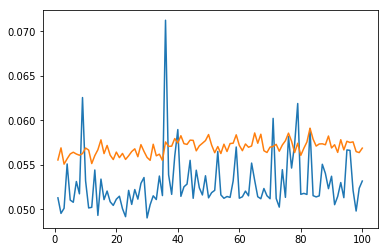

In [134]:
plt.plot([i for i in range(1, 101)], hist.history['val_loss'])
plt.plot([i for i in range(1, 101)], hist.history['loss'])
plt.show()

In [76]:
x.values.shape

(11678, 13)

In [130]:
hist.history

{'val_loss': [0.05127628280283653,
  0.0495293369542246,
  0.05010160614978777,
  0.055086749567560954,
  0.05102400497010309,
  0.050779576783310874,
  0.05311258259701402,
  0.05172921140512375,
  0.06255190513313633,
  0.053183568513964954,
  0.05014134504615444,
  0.050211192708309385,
  0.05440742022370639,
  0.049306114701783824,
  0.05338336711060511,
  0.05107676191893343,
  0.052040915834168866,
  0.05083408686396194,
  0.050427504649309264,
  0.0511232612475957,
  0.051461720711564365,
  0.05006009370905079,
  0.049159883432192346,
  0.052116553618075094,
  0.05053957306767163,
  0.05220867142285386,
  0.051132573758902615,
  0.05290455585473204,
  0.05356000042329096,
  0.04902023949647603,
  0.050502990716940734,
  0.051505844938020184,
  0.05108781924394712,
  0.05372859318166563,
  0.05153108444320013,
  0.07124285129447507,
  0.05386853218078613,
  0.051668848740319684,
  0.05596161327541691,
  0.05895286380019907,
  0.051446728867619,
  0.05252049353024731,
  0.05282411

In [164]:
model.predict(np.array([a]))

array([[0.5343838]], dtype=float32)

In [154]:
a = x.iloc[0].values

In [161]:
a.reshape((12,1))

array([[2.12141643e+04],
       [9.49557329e+04],
       [4.38565217e+02],
       [0.00000000e+00],
       [5.93479167e+02],
       [9.92063492e-02],
       [7.10000000e+00],
       [2.24000000e+00],
       [1.00000000e+02],
       [3.96825397e-01],
       [2.52000000e+02],
       [4.53541946e+00]])

In [163]:
a.shape

(12,)